# Trabalho Final referente a disciplina de Data Science 
### Aluno: Alves, Carlos F.C.

## Objetivo

Este trabalho faz a analise exploratória dos resultados obtidos do trabalho de mestrado sobre caracterização estatística da transição da convecção rasa para profunda ao longo do experimento GoAmazon2014/15.


## Introdução
Em relação a trabalhos anteriores, o trabalho de mestrado, propôs um critério para identificação da convecção profunda contornando o limite experimental para detecção de vapor dágua e aproveitando a resolução do GOES-13 além da instrumentação disponível ao longo do período.

In [1]:
import pandas as pd
import numpy as np
import csv
import re
import datetime
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
plt.style.use('ggplot')
%matplotlib inline

## INPUT FILES

The previous work was accomplished using Matlab, so I did a matlab script to export:
- [arm_vars.csv]   : Variable names of Time Series
- [arm_values.csv] : ARM DOE Time Series that was resampled by 5min and set NAN values to ones that dont have a good quality check flag provided by ARM 
- [arm_time.csv]   : date_time of each TS values in Local Time Units
- [convective_dates.csv] : convective events selected by previous work methodology

Original Data Downloaded from: http://www.archive.arm.gov/discovery/#v/results/s/



## LOAD : [arm_vars.csv]

In [2]:
arm_vars = []
with open('./data/arm_vars.csv', 'r', newline='') as f:
    reader = csv.reader(f)
    for row in reader:
        arm_vars.append(row[0])

### Create and Parse Units from arm_vars

In [3]:
arm_vars_units = []
arm_vars_names = []

for idx,var in enumerate(arm_vars):    
    arm_vars_units.append(re.search(r'\[(.*?)\]',arm_vars[idx]).group(1))  

### set a hardcoded variable Names To plot Legibility

In [4]:
arm_vars_long_names = ['Temperature',
 'Relative_Umidity',
 'Wind_Speed',
 'Rain_Intensity_ORG_815_DA',
 'Pressure',
 'Wind_Dir',
 'Rain_Intensity_PWD22',
 'PWV_LOS',
 'LWP_LOS',
 '_',
 'Radiative_Flux',
 'Percent_opaque_TSI',
 'Percent_thin_TSI',
 'Surface_Soil_heat_flux',
 'Wetness',
 'Soil_moisture',
 'Rain_Intensity_Disdrometer',
 'Median_volume_diameter_Disdrometer',
 'PWV_MWR',
 'PWV_MWR_23.835_30.0_GHz',
 'LWP_MWR',
 'LWP_MWR_23.835_30.0_GHz',
 'LCL_MWR',
 'LFC_MWR',
 'CAPE_MWR',
 'CloudBaseHeight_MWR',
 'Upwelling broadband_hemispheric_irradiance_MFRSR',
 'LWP_MWRRET',
 'PWV_MWRRET',
 'Rain_Intensity_Tipping Bucket',
 'Rad_flux_downwelling_shortwave_SKYRAD',
 'Rad_flux_downwelling_longwave_SKYRAD',
 'Rad_flux_upwelling_shortwave_GNDRAD',
 'Rad_flux_upwelling_longwave_GNDRAD',
 'Surface_Energy_Balance_SEBS']

arm_vars_names = ['T',
 'RH',
 'Wind_Speed',
 'RI_ORG_815_DA',
 'P',
 'Wind_Dir',
 'RI_PWD22',
 'PWV_LOS',
 'LWP_LOS',
 '_',
 'Radiative_Flux',
 'pc_opaque_TSI',
 'pc_thin_TSI',
 'Surface_Soil_Heat',
 'Wetness',
 'Soil_moisture',
 'RI_Disdrometer',
 'Median_D_Disdrometer',
 'PWV_MWR',
 'PWV_MWR_23_30_GHz',
 'LWP_MWR',
 'LWP_MWR_23_30_GHz',
 'LCL_MWR',
 'LFC_MWR',
 'CAPE_MWR',
 'CBH_MWR',
 'Upwelling_IRD_MFRSR',
 'LWP_MWRRET',
 'PWV_MWRRET',
 'RI_Tipping_Bucket',
 'Rad_down_shortwave_SKYRAD',
 'Rad_down_longwave_SKYRAD',
 'Rad_up_shortwave_GNDRAD',
 'Rad_up_longwave_GNDRAD',
 'Surface_Energy_Balance']

### map long and variables names with units

In [5]:
dict_var_units      = dict(zip(arm_vars_names, arm_vars_units))
dict_var_short_long = dict(zip(arm_vars_names, arm_vars_long_names))
dict_var_units

{'T': 'degC',
 'RH': '%',
 'Wind_Speed': 'm/s',
 'RI_ORG_815_DA': 'mm/h',
 'P': 'kPa',
 'Wind_Dir': 'º',
 'RI_PWD22': 'mm/h',
 'PWV_LOS': 'mm',
 'LWP_LOS': 'cm',
 '_': '',
 'Radiative_Flux': 'unitless',
 'pc_opaque_TSI': '%',
 'pc_thin_TSI': '%',
 'Surface_Soil_Heat': 'W/m^2',
 'Wetness': 'V',
 'Soil_moisture': '%',
 'RI_Disdrometer': 'mm/h',
 'Median_D_Disdrometer': 'mm',
 'PWV_MWR': 'cm',
 'PWV_MWR_23_30_GHz': 'cm',
 'LWP_MWR': 'mm',
 'LWP_MWR_23_30_GHz': 'mm',
 'LCL_MWR': 'm',
 'LFC_MWR': 'm',
 'CAPE_MWR': 'J/Kg',
 'CBH_MWR': 'm',
 'Upwelling_IRD_MFRSR': 'W/m^2',
 'LWP_MWRRET': 'g/m^2 ',
 'PWV_MWRRET': 'cm',
 'RI_Tipping_Bucket': 'mm/h',
 'Rad_down_shortwave_SKYRAD': 'W/m^2',
 'Rad_down_longwave_SKYRAD': 'W/m^2',
 'Rad_up_shortwave_GNDRAD': 'W/m^2',
 'Rad_up_longwave_GNDRAD': 'W/m^2',
 'Surface_Energy_Balance': 'W/m^2'}

## LOAD Dataframe from 'arm_values.csv' 

In [6]:
df_valores =  pd.read_csv('./data/arm_values.csv',names=arm_vars_names)

df_valores.columns

Index(['T', 'RH', 'Wind_Speed', 'RI_ORG_815_DA', 'P', 'Wind_Dir', 'RI_PWD22',
       'PWV_LOS', 'LWP_LOS', '_', 'Radiative_Flux', 'pc_opaque_TSI',
       'pc_thin_TSI', 'Surface_Soil_Heat', 'Wetness', 'Soil_moisture',
       'RI_Disdrometer', 'Median_D_Disdrometer', 'PWV_MWR',
       'PWV_MWR_23_30_GHz', 'LWP_MWR', 'LWP_MWR_23_30_GHz', 'LCL_MWR',
       'LFC_MWR', 'CAPE_MWR', 'CBH_MWR', 'Upwelling_IRD_MFRSR', 'LWP_MWRRET',
       'PWV_MWRRET', 'RI_Tipping_Bucket', 'Rad_down_shortwave_SKYRAD',
       'Rad_down_longwave_SKYRAD', 'Rad_up_shortwave_GNDRAD',
       'Rad_up_longwave_GNDRAD', 'Surface_Energy_Balance'],
      dtype='object')

## LOAD : [arm_time.csv] 

output : df_valores

Parte Time   :'31-Dec-2013 20:05:06'
Using format : "%d-%b-%Y %H:%M:%S"

In [7]:
arm_time_str = []
with open('./data/arm_time.csv', 'r', newline='') as f:
    reader = csv.reader(f)
    for row in reader:
        arm_time_str.append(row[0])

# PARSE DATE TIME and set INDEX        
df_valores.insert(loc=0, column='time_str', value=arm_time_str)
df_valores.insert(loc=0, column='dt_datetime', value=datetime.datetime.today())
df_valores['dt_datetime'] = datetime.datetime.today()


In [9]:
df_valores['time_str'][1]

'31-Dec-2013 20:05:06'

In [8]:
for i in np.arange(df_valores.shape[0]):
    df_valores.loc[i,'dt_datetime'] = datetime.datetime.strptime(df_valores['time_str'][i], "%d-%b-%Y %H:%M:%S")


In [12]:
df_valores.set_index(df_valores["dt_datetime"],inplace=True)
df_valores.head()

dt_datetime   T  RH  Wind_Speed  RI_ORG_815_DA  \
dt_datetime                                                                  
2013-12-31 20:00:06 2013-12-31 20:00:06 NaN NaN         NaN            NaN   
2013-12-31 20:05:06 2013-12-31 20:05:06 NaN NaN         NaN            NaN   
2013-12-31 20:10:06 2013-12-31 20:10:06 NaN NaN         NaN            NaN   
2013-12-31 20:15:06 2013-12-31 20:15:06 NaN NaN         NaN            NaN   
2013-12-31 20:20:06 2013-12-31 20:20:06 NaN NaN         NaN            NaN   

                      P  Wind_Dir  RI_PWD22  PWV_LOS  LWP_LOS  \
dt_datetime                                                     
2013-12-31 20:00:06 NaN       NaN       NaN      NaN      NaN   
2013-12-31 20:05:06 NaN       NaN       NaN      NaN      NaN   
2013-12-31 20:10:06 NaN       NaN       NaN      NaN      NaN   
2013-12-31 20:15:06 NaN       NaN       NaN      NaN      NaN   
2013-12-31 20:20:06 NaN       NaN       NaN      NaN      NaN   

                              ...            CBH_MWR  Upwelling_IRD_MFRSR  \
dt_datetime                   ...                                           
2013-12-31 20:00:06           ...                NaN                  NaN   
2013-12-31 20:05:06           ...                NaN                  NaN   
2013-12-31 20:10:06           ...                NaN                  NaN   
2013-12-31 20:15:06           ...                NaN                  NaN   
2013-12-31 20:20:06           ...                NaN                  NaN   

                     LWP_MWRRET  PWV_MWRRET  RI_Tipping_Bucket  \
dt_datetime                                                      
2013-12-31 20:00:06         NaN         NaN                NaN   
2013-12-31 20:05:06         NaN         NaN                NaN   
2013-12-31 20:10:06         NaN         NaN                NaN   
2013-12-31 20:15:06         NaN         NaN                NaN   
2013-12-31 20:20:06         NaN         NaN                NaN   

                     Rad_down_shortwave_SKYRAD  Rad_down_longwave_SKYRAD  \
dt_datetime                                                                
2013-12-31 20:00:06                        NaN                       NaN   
2013-12-31 20:05:06                        NaN                       NaN   
2013-12-31 20:10:06                        NaN                       NaN   
2013-12-31 20:15:06                        NaN                       NaN   
2013-12-31 20:20:06                        NaN                       NaN   

                     Rad_up_shortwave_GNDRAD  Rad_up_longwave_GNDRAD  \
dt_datetime                                                            
2013-12-31 20:00:06                      NaN                     NaN   
2013-12-31 20:05:06                      NaN                     NaN   
2013-12-31 20:10:06                      NaN                     NaN   
2013-12-31 20:15:06                      NaN                     NaN   
2013-12-31 20:20:06                      NaN                     NaN   

                     Surface_Energy_Balance  
dt_datetime                                  
2013-12-31 20:00:06                     NaN  
2013-12-31 20:05:06                     NaN  
2013-12-31 20:10:06                     NaN  
2013-12-31 20:15:06                     NaN  
2013-12-31 20:20:06                     NaN  

[5 rows x 36 columns]

In [ ]:
df_valores = df_valores.drop('time_str', axis = 1)

# Preprocessing Stage

Here we will investivestigate about Data:
- Avaiability
- Quality


## Data availability

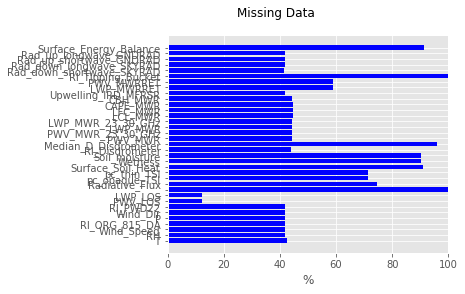

In [13]:
nullvalueAbs = df_valores.isnull().sum().values
nullvaluespc = (df_valores.isnull().sum().values/df_valores.shape[0])*100

y_pos = np.arange(len(arm_vars_names))

fig,ax = plt.subplots()
ax.barh(y_pos, nullvaluespc[1:], color = 'blue')
ax.set_yticks(y_pos)
ax.set_yticklabels(arm_vars_names)
ax.set_xlim(0,100)
ax.set_xlabel('%')
plt.suptitle('Missing Data')
plt.gcf().subplots_adjust(left=0.25)
plt.show()

### Drop all TS with null values > 50 ->df_valores_1

OUT: df_valores_1

Its possible to see that a loot of variables dont have any data, so we will work only with TimeSeries that have less then 50% of missing data.  

In [14]:
df_valores.columns[nullvaluespc > 50]

df_valores_1 = df_valores.copy()
df_valores_1 = df_valores_1.drop(df_valores_1.columns[nullvaluespc > 50],axis=1)
 

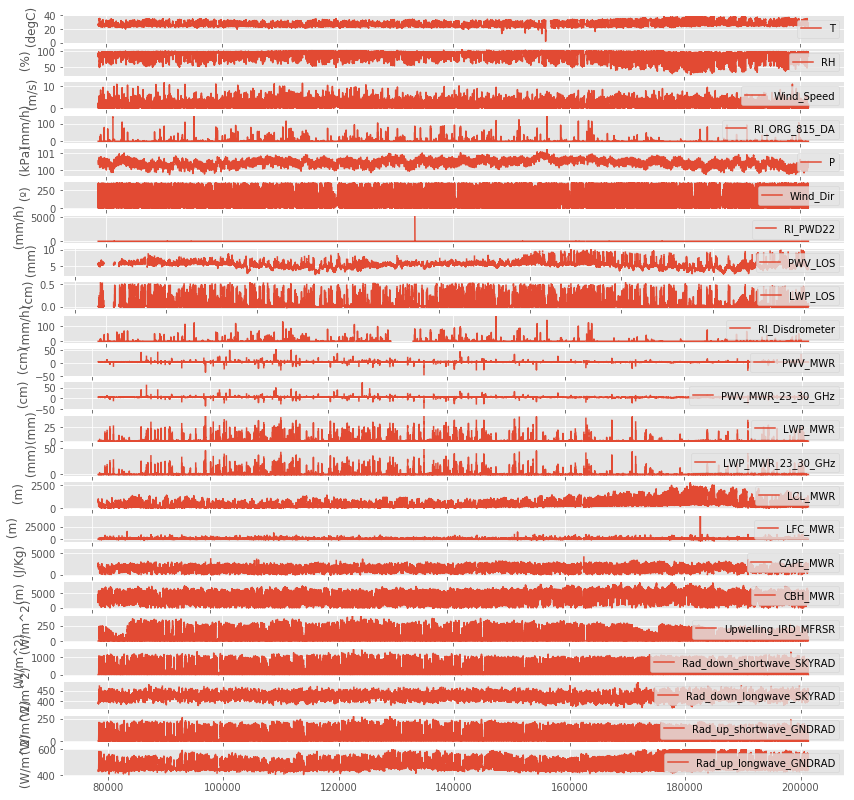

In [15]:
plt.figure(figsize=(14, 14))
for j in np.arange(1,df_valores_1.shape[1]):
    plt.subplot((df_valores_1.shape[1]-1),1,j)
    plt.plot(df_valores_1[df_valores_1.columns[j]].values,label=df_valores_1.columns[j])
    plt.ylabel(" (" + dict_var_units[df_valores_1.columns[j]] + ")")
    plt.legend(loc = 'upper right')
    

###  Data Availability in same time interval

To make this plot we will just set a different number "j" for each valid data, soter in df_window and plot the availability during the field campaing 

In [16]:
df_window = df_valores_1.copy()

idxs = np.arange(0,df_valores_1.shape[0])

for j in np.arange(1,df_valores_1.shape[1]):
    idxs_notnan = idxs[pd.notnull(df_valores_1.iloc[:,j])]
    df_window.iloc[idxs_notnan,j] = j

Text(0.5,1,'Data Availability')

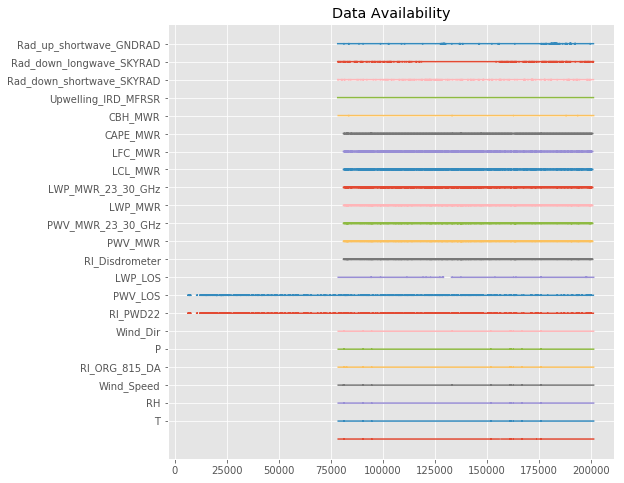

In [17]:
plt.figure(figsize=(8, 8))
plt.yticks(np.arange(2,df_window.shape[1]), df_window.columns[1:])
for j in np.arange(1,df_window.shape[1]):
    plt.plot(df_window[df_window.columns[j]].values)
plt.title('Data Availability')

### SELECT : TimeDate range that all TS has Valid Data --> df_valores_2

OUT: df_valores_2

Its possible to see that exist just a range during the campaing that all TS has data, so we will use a ANDING process in mask_not_null and get the first and the last time that ALL TS have data. After that we will slice df_valore_1 and create df_valores_2 corresponding to that period. 

In [18]:
mask_not_null = pd.notnull(df_valores_1.iloc[:,1]).values
    
for j in np.arange(2,df_valores_1.shape[1]):
    mask_not_null = mask_not_null & pd.notnull(df_valores_1.iloc[:,j]).values

commom_valid_idx = idxs[mask_not_null]    
first_valid_idx = commom_valid_idx[0]    
last_valid_idx = commom_valid_idx[-1]    

np.arange(0,first_valid_idx)

start = df_valores_1.iloc[first_valid_idx,0]
end =  df_valores_1.iloc[last_valid_idx,0]

df_valores_2 = df_valores_1[(df_valores_1.dt_datetime > start) &  (df_valores_1.dt_datetime < end)].copy()


### Check Data Quality : Visual inspect each TS

In [19]:
meteo_vars = df_valores_2.columns[np.hstack((np.arange(1,8),10))]
termo_vars = df_valores_2.columns[np.hstack((np.arange(8,10),np.arange(11,19)))]
rad_vars   = df_valores_2.columns[19:]

rain_intensity_vars = meteo_vars[[3,6,7]]
meteo_vars_exclude_rain = set(meteo_vars)-set(rain_intensity_vars)

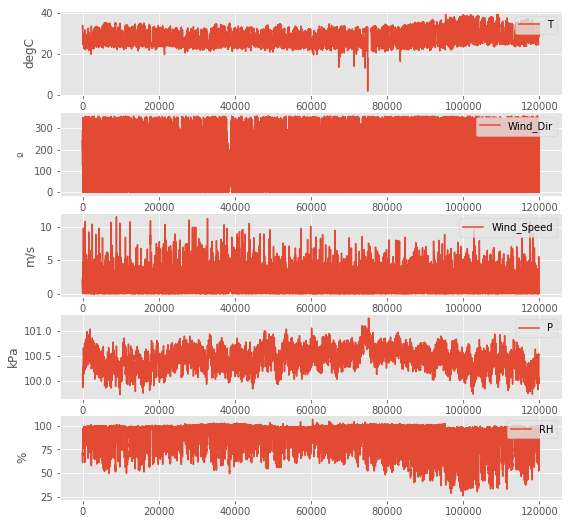

In [20]:
plt.figure(figsize=(9, 9))
meteo_vars_exclude_rain = set(meteo_vars)-set(meteo_vars[[3,6,7]])
for idx,var in enumerate(meteo_vars_exclude_rain):
    plt.subplot(len(meteo_vars_exclude_rain),1,idx+1)
    plt.plot(df_valores_2[var].values,label=var)
    plt.ylabel(dict_var_units[var])
    plt.legend(loc = 'upper right')

###  SET NAN to Temperatura < 10, impossible in Central Amazon

In [21]:
df_valores_2.loc[df_valores_2['T'] < 10] = np.nan

### Correct Offtset of  RH 

In [22]:
df_valores_2.columns[2]

'RH'

In [23]:
for i in np.arange(df_valores_2.shape[0]):
    if df_valores_2.iloc[i,2]  > 100:
        offset = df_valores_2.iloc[i,2] - 100
        df_valores_2.iloc[i,2] = df_valores_2.iloc[i,2] - offset

## RAIN intensity

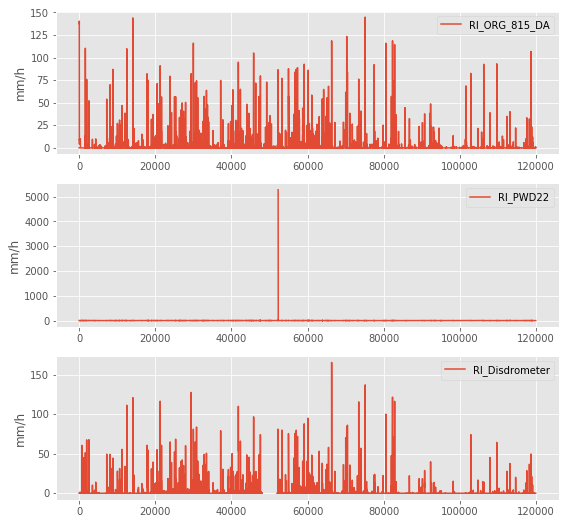

In [24]:
plt.figure(figsize=(9, 9))
for idx,var in enumerate(rain_intensity_vars ):
    plt.subplot(len(rain_intensity_vars),1,idx+1)
    plt.plot(df_valores_2[var].values,label=var)
    plt.ylabel(dict_var_units[var])
    plt.legend(loc = 'upper right')
    

### Set NAN to Rain Intensity PWD  > 200

In [25]:
df_valores_2.loc[df_valores_2['RI_PWD22'] > 200] = np.nan

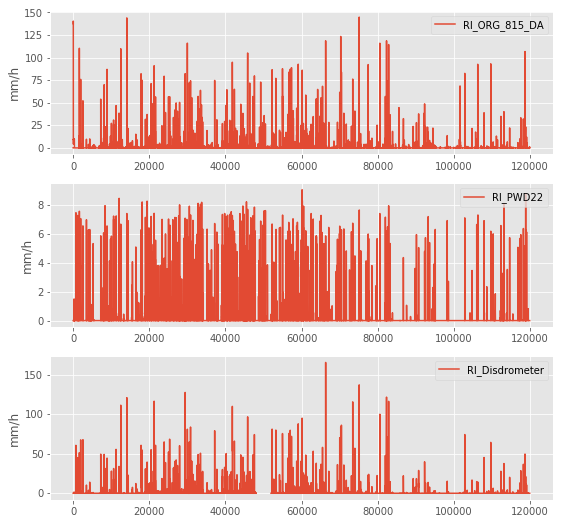

In [26]:
plt.figure(figsize=(9, 9))
for idx,var in enumerate(rain_intensity_vars ):
    plt.subplot(len(rain_intensity_vars),1,idx+1)
    plt.plot(df_valores_2[var].values,label=var)
    plt.ylabel(dict_var_units[var])
    plt.legend(loc = 'upper right')


### Drop PWD, too small values  --> df_valores_3

In [27]:
df_valores_2.columns[7]

'RI_PWD22'

In [28]:
df_valores_3 = df_valores_2.copy()
df_valores_3 = df_valores_3.drop(df_valores_3.columns[7],axis=1)

### Radiometric Variables

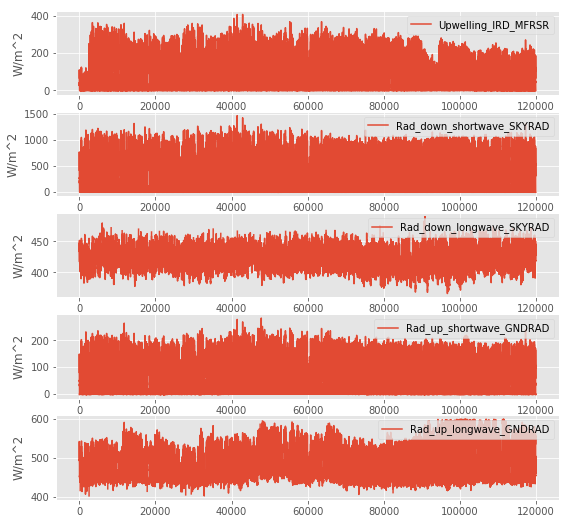

In [29]:
# RAD vars
rad_vars   = df_valores_3.columns[18:]

plt.figure(figsize=(9, 9))
for idx,var in enumerate(rad_vars):
    plt.subplot(len(rad_vars),1,idx+1)
    plt.plot(df_valores_3[var].values,label=var)
    plt.ylabel(dict_var_units[var])
    plt.legend(loc = 'upper right')


## Data Transform 

OUT: df_15min

Due to slow processing to perform Data Exploration the data will be resampled to 15min and will be recorded in df_15min data frame

In [46]:
df_15min = pd.DataFrame()
for idx,c in enumerate(df_valores_3.columns[1:]):
    df_15min[c] = df_valores_3[c].resample('15min').mean()
df_15min.head(2)

T      RH  Wind_Speed  RI_ORG_815_DA           P  \
dt_datetime                                                                     
2014-10-09 12:45:00  32.353000  71.285    2.111500       0.158500  100.125000   
2014-10-09 13:00:00  32.825333  68.986    2.118533       0.156067  100.096667   

                       Wind_Dir   PWV_LOS   LWP_LOS  RI_Disdrometer  PWV_MWR  \
dt_datetime                                                                    
2014-10-09 12:45:00  194.230000       NaN       NaN             0.0   5.4821   
2014-10-09 13:00:00  209.393333  5.013867  0.007359             0.0   5.3526   

                              ...            LWP_MWR_23_30_GHz     LCL_MWR  \
dt_datetime                   ...                                            
2014-10-09 12:45:00           ...                    -0.076044  682.160000   
2014-10-09 13:00:00           ...                    -0.067259  769.486667   

                        LFC_MWR  CAPE_MWR      CBH_MWR  Upwelling_IRD_MFRSR  \
dt_datetime                                                                   
2014-10-09 12:45:00  770.315000    2555.7  3477.350000            73.712500   
2014-10-09 13:00:00  811.436667    2585.3  2906.333333            81.157667   

                     Rad_down_shortwave_SKYRAD  Rad_down_longwave_SKYRAD  \
dt_datetime                                                                
2014-10-09 12:45:00                     467.79                444.240000   
2014-10-09 13:00:00                     528.78                445.606667   

                     Rad_up_shortwave_GNDRAD  Rad_up_longwave_GNDRAD  
dt_datetime                                                           
2014-10-09 12:45:00                90.629000              506.380000  
2014-10-09 13:00:00               103.914667              515.826667  

[2 rows x 22 columns]

# Data Exploration

In [31]:
meteo_vars = ['T', 'P', 'RH', 'Wind_Speed','Wind_Dir','CBH_MWR']
rain_vars = ['RI_ORG_815_DA','RI_Disdrometer'] 
termo_vars = ['PWV_LOS', 'LWP_LOS', 'PWV_MWR','PWV_MWR_23_30_GHz', 'LWP_MWR', 'LWP_MWR_23_30_GHz', 'LCL_MWR', 'LFC_MWR', 'CAPE_MWR']
rad_vars = ['Upwelling_IRD_MFRSR','Rad_down_shortwave_SKYRAD','Rad_down_longwave_SKYRAD','Rad_up_shortwave_GNDRAD','Rad_up_longwave_GNDRAD']

## SIMPLE Correlations 

To inspect about linear and instant correlations we used here scatter matrix plot 

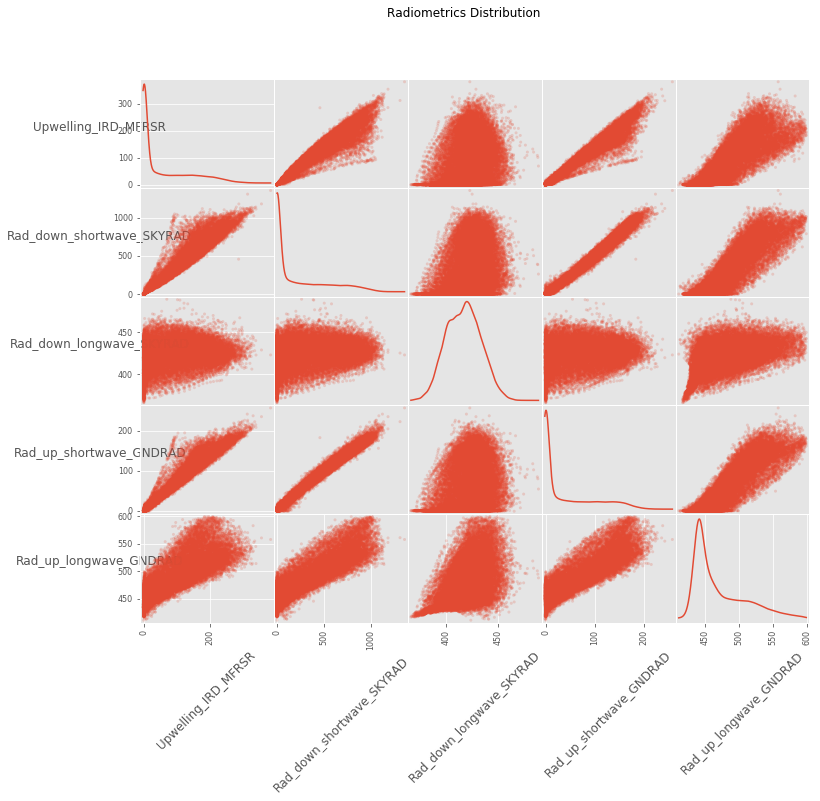

In [32]:
sm = scatter_matrix(df_15min[rad_vars], alpha=0.2,figsize=(12, 10) ,diagonal='kde')
plt.suptitle('Radiometrics Distribution')
#Change label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]
#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.3,0.5) for s in sm.reshape(-1)]
plt.show()

The scatter plot indicates that in general radiometric variables presents some linear correlation. Its important to inpect by other type of correlations: nonlinear and not instantaneos.
This plot resulted in a fited distribution of each variable, that lays in matrix diagonal. Its possible to see a tunned long wave radiation emittion and a narrow peak of incoming long wave, that indicate the cloud scattering to the ground
Further analysis of shortwave distribution is needed, maybe this distribution indicates a scale-free process

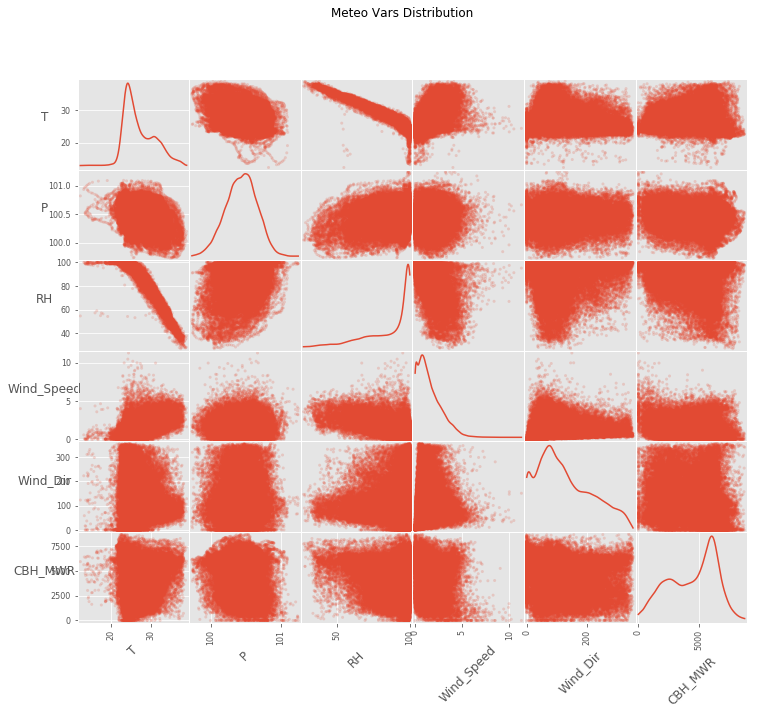

In [33]:
sm = scatter_matrix(df_15min[meteo_vars], alpha=0.2,figsize=(12, 10), diagonal='kde')
plt.suptitle('Meteo Vars Distribution')
#Change label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]
#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.3,0.5) for s in sm.reshape(-1)]
plt.show()


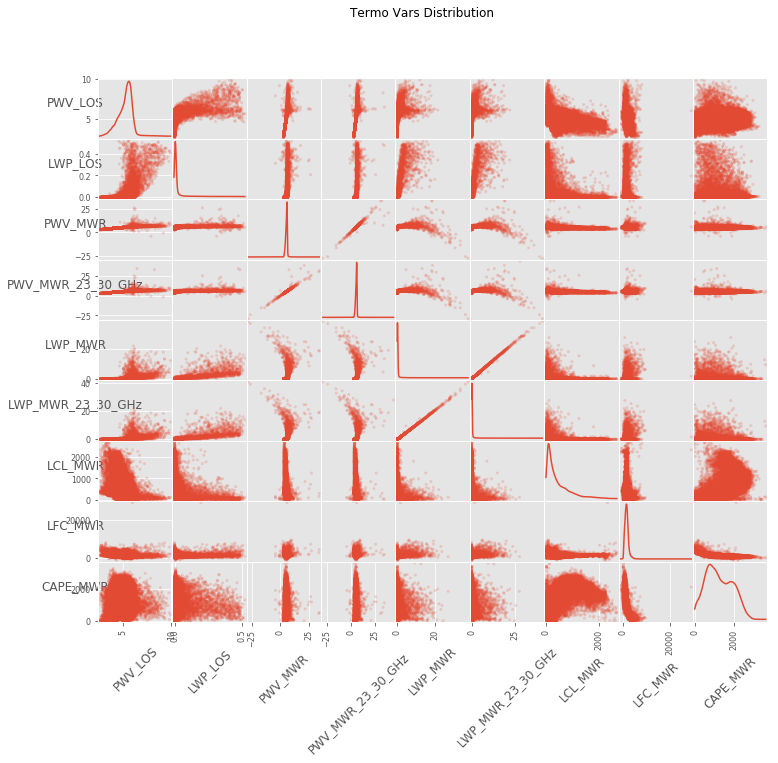

In [34]:
sm = scatter_matrix(df_15min[termo_vars], alpha=0.2, figsize=(12, 10),diagonal='kde')
plt.suptitle('Termo Vars Distribution')
#Change label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]
#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.3,0.5) for s in sm.reshape(-1)]
plt.show() 

# Load Convective Days

[convective_dates.csv] 

In [35]:
df_convectives =  pd.read_csv('./data/convective_dates.csv',names=['event_time_str'])

In [36]:
df_convectives.head()

event_time_str
05-Jan-2014 15:42:361             NaN
06-Jan-2014 14:12:361             NaN
08-Jan-2014 15:42:361             NaN
10-Jan-2014 06:12:361             NaN
12-Jan-2014 14:42:361             NaN

In [37]:
as_list = df_convectives.index.tolist()

for i in np.arange(0,len(as_list)):
    tmp = as_list[i]
    as_list[i] = tmp[0:-1]

as_list[1:3]

['06-Jan-2014 14:12:36', '08-Jan-2014 15:42:36']

In [38]:
df_convectives.insert(loc=0, column='time_str', value=as_list)
df_convectives = df_convectives.drop('event_time_str',axis=1) 

In [39]:
print(df_convectives.shape[0])
df_convectives.head()

326


time_str
05-Jan-2014 15:42:361  05-Jan-2014 15:42:36
06-Jan-2014 14:12:361  06-Jan-2014 14:12:36
08-Jan-2014 15:42:361  08-Jan-2014 15:42:36
10-Jan-2014 06:12:361  10-Jan-2014 06:12:36
12-Jan-2014 14:42:361  12-Jan-2014 14:42:36

In [40]:
df_convectives.insert(loc=0, column='dt_datetime', value=datetime.datetime.today())

In [41]:
for i in np.arange(1,df_convectives.shape[0]):
    df_convectives.iloc[i,0] = datetime.datetime.strptime(df_convectives['time_str'][i], '%d-%b-%Y %H:%M:%S')
df_convectives.set_index(df_convectives["dt_datetime"],inplace=True)    
df_convectives.drop('time_str',axis=1)

dt_datetime
dt_datetime                                          
2018-09-18 05:24:44.849582 2018-09-18 05:24:44.849582
2014-01-06 14:12:36.000000 2014-01-06 14:12:36.000000
2014-01-08 15:42:36.000000 2014-01-08 15:42:36.000000
2014-01-10 06:12:36.000000 2014-01-10 06:12:36.000000
2014-01-12 14:42:36.000000 2014-01-12 14:42:36.000000
2014-01-12 17:42:36.000000 2014-01-12 17:42:36.000000
2014-01-13 05:12:36.000000 2014-01-13 05:12:36.000000
2014-01-17 14:12:36.000000 2014-01-17 14:12:36.000000
2014-01-18 11:42:36.000000 2014-01-18 11:42:36.000000
2014-01-19 10:12:36.000000 2014-01-19 10:12:36.000000
2014-01-20 23:42:36.000000 2014-01-20 23:42:36.000000
2014-01-23 19:12:36.000000 2014-01-23 19:12:36.000000
2014-01-25 17:42:36.000000 2014-01-25 17:42:36.000000
2014-02-02 10:12:36.000000 2014-02-02 10:12:36.000000
2014-02-03 15:42:36.000000 2014-02-03 15:42:36.000000
2014-02-04 20:12:36.000000 2014-02-04 20:12:36.000000
2014-02-05 16:12:36.000000 2014-02-05 16:12:36.000000
2014-02-07 12:12:36.000000 2014-02-07 12:12:36.000000
2014-02-08 17:12:36.000000 2014-02-08 17:12:36.000000
2014-02-10 12:12:36.000000 2014-02-10 12:12:36.000000
2014-02-11 12:12:36.000000 2014-02-11 12:12:36.000000
2014-02-13 09:42:36.000000 2014-02-13 09:42:36.000000
2014-02-13 16:42:36.000000 2014-02-13 16:42:36.000000
2014-02-14 03:12:36.000000 2014-02-14 03:12:36.000000
2014-02-16 18:42:36.000000 2014-02-16 18:42:36.000000
2014-02-17 17:12:36.000000 2014-02-17 17:12:36.000000
2014-02-18 14:42:36.000000 2014-02-18 14:42:36.000000
2014-02-21 04:12:36.000000 2014-02-21 04:12:36.000000
2014-02-22 13:12:36.000000 2014-02-22 13:12:36.000000
2014-02-23 11:12:36.000000 2014-02-23 11:12:36.000000
...                                               ...
2015-10-26 19:12:36.000000 2015-10-26 19:12:36.000000
2015-10-27 21:42:36.000000 2015-10-27 21:42:36.000000
2015-10-28 15:12:36.000000 2015-10-28 15:12:36.000000
2015-10-31 21:42:36.000000 2015-10-31 21:42:36.000000
2015-11-02 14:12:36.000000 2015-11-02 14:12:36.000000
2015-11-03 01:12:36.000000 2015-11-03 01:12:36.000000
2015-11-04 15:12:36.000000 2015-11-04 15:12:36.000000
2015-11-05 18:12:36.000000 2015-11-05 18:12:36.000000
2015-11-06 08:42:36.000000 2015-11-06 08:42:36.000000
2015-11-09 13:12:36.000000 2015-11-09 13:12:36.000000
2015-11-10 22:12:36.000000 2015-11-10 22:12:36.000000
2015-11-14 11:42:36.000000 2015-11-14 11:42:36.000000
2015-11-19 17:42:36.000000 2015-11-19 17:42:36.000000
2015-11-19 23:12:36.000000 2015-11-19 23:12:36.000000
2015-11-21 15:12:36.000000 2015-11-21 15:12:36.000000
2015-11-25 13:12:36.000000 2015-11-25 13:12:36.000000
2015-11-26 04:12:36.000000 2015-11-26 04:12:36.000000
2015-12-03 12:12:36.000000 2015-12-03 12:12:36.000000
2015-12-06 05:42:36.000000 2015-12-06 05:42:36.000000
2015-12-06 11:12:36.000000 2015-12-06 11:12:36.000000
2015-12-08 21:42:36.000000 2015-12-08 21:42:36.000000
2015-12-11 12:12:36.000000 2015-12-11 12:12:36.000000
2015-12-12 18:12:36.000000 2015-12-12 18:12:36.000000
2015-12-13 08:42:36.000000 2015-12-13 08:42:36.000000
2015-12-15 16:12:36.000000 2015-12-15 16:12:36.000000
2015-12-16 16:12:36.000000 2015-12-16 16:12:36.000000
2015-12-21 11:42:36.000000 2015-12-21 11:42:36.000000
2015-12-24 13:12:36.000000 2015-12-24 13:12:36.000000
2015-12-28 11:12:36.000000 2015-12-28 11:12:36.000000
2015-12-28 21:12:36.000000 2015-12-28 21:12:36.000000

[326 rows x 1 columns]

start = resampled Datetime of first convective day

end   = resampled Datetime of last convective day

In [48]:
start = df_15min.index[0]
end = df_15min.index[-1]
start

Timestamp('2014-10-09 12:45:00', freq='15T')

In [49]:
df_convectives_1 = df_convectives[ (df_convectives['dt_datetime'] >= start ) & (df_convectives['dt_datetime'] <= end )].copy()
df_convectives_1['dt_datetime'][0]

Timestamp('2014-10-10 09:12:36')

In [51]:
df_convectives_1.shape[0]

181

### Generate Matrix for each TS

| var = T  |D1 |D2 |D3 |... |D326|
|--------------------------------|   
|t1        |   |   |   |    |    |
|t2        |   |   |   |    |    |
|t3        |   |   |   |    |    |
|...       |   |   |   |    |    |
|t23       |   |   |   |    |    |


This kind of structure is used to explore each convective day for each TS

In [52]:
df_15min.insert(loc=0, column='dt_datetime', value=df_15min.index)

In [53]:
i = 132 # df_convectives
i = 2   # df_convectives_1
dfSelected = df_15min[ (df_15min['dt_datetime'].dt.day == df_convectives_1.dt_datetime.iloc[i].day) & (df_15min['dt_datetime'].dt.month == df_convectives_1.dt_datetime.iloc[i].month) & (df_15min['dt_datetime'].dt.year == df_convectives_1.dt_datetime.iloc[i].year)].copy()
print(len(dfSelected['T'][:].values))
time_length = len(dfSelected['T'][:].values)
dfSelected['T'][:].values

96


array([24.45666667, 24.35266667, 24.32533333, 24.19466667, 24.19733333,
       24.00066667, 23.85533333, 23.81533333, 23.874     , 23.71133333,
       23.58333333, 23.472     , 23.322     , 23.25133333, 23.26333333,
       23.31      , 23.22533333, 23.14066667, 23.12066667, 23.08733333,
       23.00066667, 22.87733333, 22.88866667, 22.776     , 22.92266667,
       23.102     , 23.506     , 24.07333333, 24.928     , 25.75      ,
       26.26266667, 26.844     , 27.36866667, 27.674     , 28.43466667,
       29.24666667, 29.504     , 29.58866667, 29.704     , 29.992     ,
       30.252     , 30.302     , 27.558     , 24.03733333, 23.94333333,
       23.99266667, 24.10666667, 24.172     , 24.14066667, 24.092     ,
       24.028     , 23.948     , 24.00866667, 24.11666667, 24.42133333,
       24.68333333, 25.36866667, 25.716     , 25.99      , 26.338     ,
       26.45866667, 26.34866667, 26.222     , 26.16      , 25.94066667,
       25.70333333, 25.528     , 25.392     , 25.32933333, 25.15

## Create nMatrix to store TS to each convective day 
Each numpy array has the exact name of df_15min.columns

In [54]:
din_var = {}
for idx in np.arange(1,len(df_15min.columns)):
    globals()[df_15min.columns[idx]] = np.zeros((time_length,df_convectives_1.shape[0],),dtype=np.float64)
    globals()[str('df_') + df_15min.columns[idx]] = pd.DataFrame()
    

In [55]:
# TEST
# assing all times of event = 2 in var = 1
print(df_15min.columns[1])
vars()['T'][:,2] = dfSelected['T'][:].values
print(vars()['T'].shape)

T
(96, 181)


In [56]:
for ievent in np.arange(df_convectives_1.shape[0]):
    dfSelected = df_15min[ (df_15min['dt_datetime'].dt.day == df_convectives_1.dt_datetime.iloc[ievent].day) & (df_15min['dt_datetime'].dt.month == df_convectives_1.dt_datetime.iloc[ievent].month) & (df_15min['dt_datetime'].dt.year == df_convectives_1.dt_datetime.iloc[ievent].year)].copy()
    non_zero_list = []
    for c in np.arange(1,len(df_15min.columns)):
        values_size = dfSelected[dfSelected.columns[c]].values.size
        non_zero = np.count_nonzero(dfSelected[dfSelected.columns[c]].values)
        
        if values_size > 0 :
            #print(dfSelected[dfSelected.columns[c]].values)
            vars()[df_15min.columns[c]][:,ievent] = dfSelected[dfSelected.columns[c]][:].values
            non_zero_list.append(non_zero)
        
    print("Event : " + str(df_convectives.shape[0]-ievent) + "  (" + str(non_zero_list) + ")")

Event : 326  ([96, 96, 93, 60, 96, 93, 96, 96, 10, 96, 96, 96, 96, 96, 96, 96, 96, 96, 51, 96, 50, 96])
Event : 325  ([96, 96, 94, 0, 96, 94, 96, 96, 24, 96, 96, 96, 96, 96, 96, 96, 96, 96, 51, 96, 50, 96])
Event : 324  ([96, 96, 92, 20, 96, 92, 96, 96, 15, 96, 96, 96, 96, 96, 96, 96, 96, 96, 51, 96, 50, 96])
Event : 323  ([96, 96, 96, 22, 96, 96, 96, 96, 8, 96, 96, 96, 96, 96, 96, 96, 96, 96, 51, 96, 51, 96])
Event : 322  ([96, 96, 93, 4, 96, 93, 96, 96, 0, 96, 96, 96, 96, 96, 96, 96, 96, 96, 50, 96, 50, 96])
Event : 321  ([96, 96, 93, 30, 96, 93, 96, 96, 12, 96, 96, 96, 96, 96, 96, 96, 96, 96, 51, 96, 50, 96])
Event : 320  ([96, 96, 95, 23, 96, 95, 96, 96, 14, 96, 96, 96, 96, 96, 96, 96, 96, 96, 51, 96, 51, 96])
Event : 319  ([96, 96, 95, 28, 96, 95, 96, 96, 18, 96, 96, 96, 96, 96, 96, 96, 96, 96, 51, 96, 50, 96])
Event : 318  ([96, 96, 94, 16, 96, 94, 96, 96, 10, 96, 96, 96, 96, 96, 96, 96, 96, 96, 50, 96, 50, 96])
Event : 317  ([96, 96, 93, 26, 96, 93, 96, 96, 7, 96, 96, 96, 96, 96

Event : 246  ([96, 96, 92, 32, 96, 92, 96, 96, 20, 96, 96, 96, 96, 96, 96, 96, 93, 96, 50, 96, 50, 96])
Event : 245  ([96, 96, 89, 28, 96, 89, 96, 96, 26, 96, 96, 96, 96, 96, 96, 96, 95, 96, 50, 96, 50, 96])
Event : 244  ([96, 96, 93, 39, 96, 93, 96, 96, 27, 96, 96, 96, 96, 96, 96, 96, 96, 96, 50, 96, 50, 96])
Event : 243  ([96, 96, 95, 43, 96, 95, 96, 96, 37, 96, 96, 96, 96, 96, 96, 96, 95, 96, 50, 96, 50, 96])
Event : 242  ([96, 96, 94, 39, 96, 94, 96, 96, 25, 96, 96, 96, 96, 96, 96, 96, 95, 96, 50, 96, 50, 96])
Event : 241  ([96, 96, 92, 27, 96, 92, 96, 96, 19, 96, 96, 96, 96, 96, 96, 96, 95, 96, 51, 96, 51, 96])
Event : 240  ([96, 96, 96, 63, 96, 96, 96, 96, 48, 96, 96, 96, 96, 96, 96, 96, 93, 96, 51, 96, 51, 96])
Event : 239  ([96, 96, 94, 15, 96, 94, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 51, 96, 51, 96])
Event : 238  ([96, 96, 94, 22, 96, 94, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 50, 96, 51, 96])
Event : 237  ([96, 96, 91, 33, 96, 91, 96, 96, 96, 96, 96, 96, 9

Event : 154  ([96, 96, 91, 41, 96, 91, 96, 96, 36, 96, 96, 96, 96, 96, 96, 96, 83, 96, 51, 96, 50, 96])
Event : 153  ([96, 96, 95, 8, 96, 95, 96, 96, 2, 96, 96, 96, 96, 96, 96, 96, 96, 96, 51, 96, 50, 96])
Event : 152  ([96, 96, 93, 5, 96, 93, 96, 96, 3, 96, 96, 96, 96, 96, 96, 96, 96, 96, 51, 96, 50, 96])
Event : 151  ([96, 96, 84, 13, 96, 84, 96, 96, 2, 96, 96, 96, 96, 96, 96, 96, 96, 96, 51, 96, 50, 96])
Event : 150  ([96, 96, 94, 13, 96, 94, 96, 96, 6, 96, 96, 96, 96, 96, 96, 96, 96, 96, 51, 96, 50, 96])
Event : 149  ([96, 96, 94, 13, 96, 94, 96, 96, 6, 96, 96, 96, 96, 96, 96, 96, 96, 96, 51, 96, 50, 96])
Event : 148  ([96, 96, 95, 8, 96, 95, 96, 96, 3, 96, 96, 96, 96, 96, 96, 96, 96, 96, 51, 96, 51, 96])
Event : 147  ([96, 96, 92, 7, 96, 92, 96, 96, 3, 96, 96, 96, 96, 96, 96, 96, 95, 96, 51, 96, 50, 96])
Event : 146  ([96, 96, 96, 31, 96, 96, 96, 96, 23, 96, 96, 96, 96, 96, 96, 96, 92, 96, 51, 96, 50, 96])


## Cluster

In [58]:

teste = np.transpose(LFC_MWR)
teste[10,:] == LFC_MWR[:,10]
series = np.asmatrix(teste)

from dtaidistance import dtw

ds = dtw.distance_matrix_fast(series)
print(ds)

[[inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]
 ...
 [inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]]


### Because of this error we must investigate further to decice what to do with NAN data

In [59]:
from dtaidistance import clustering

model1 = clustering.Hierarchical(dtw.distance_matrix_fast, {})
model2 = clustering.HierarchicalTree(model1)
model3 = clustering.LinkageTree(dtw.distance_matrix_fast, {})

cluster_idx = model3.fit(series)

ValueError: The condensed distance matrix must contain only finite values.

## Plot Missing Value by event for each TS and All TS with more than 20 Missing Value per Event

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


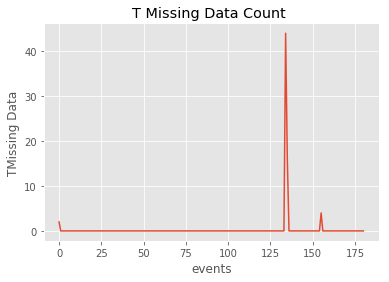

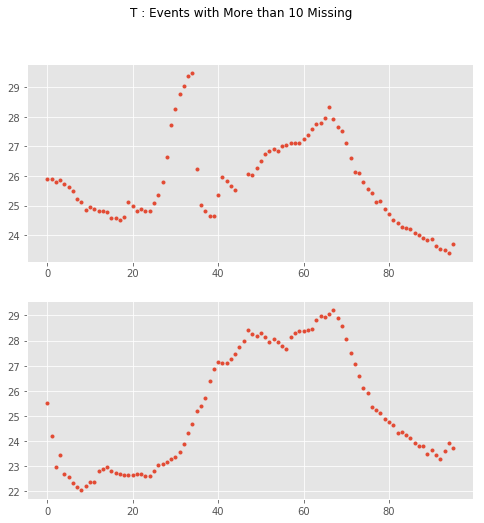

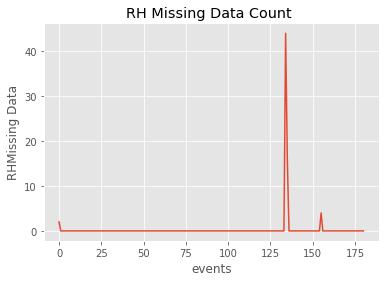

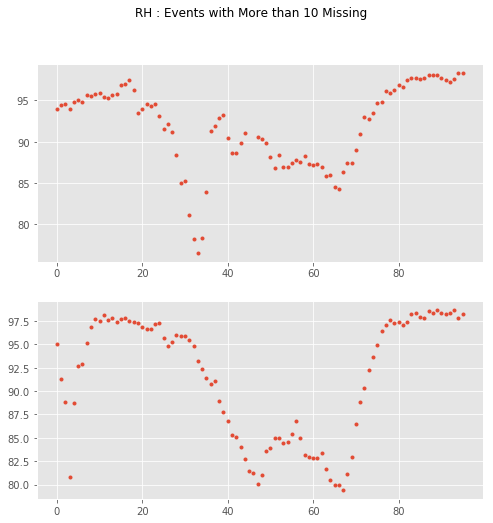

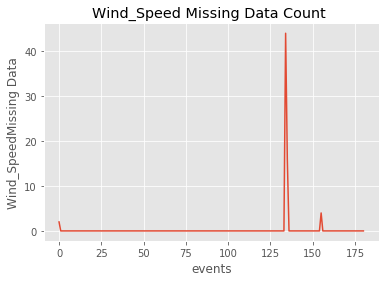

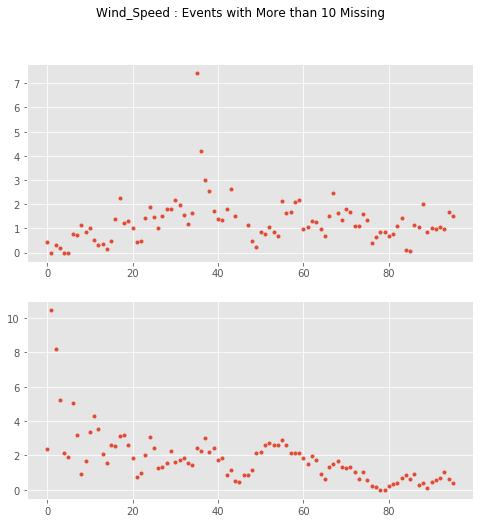

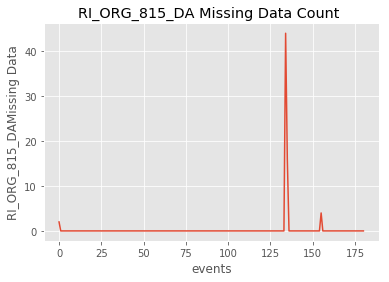

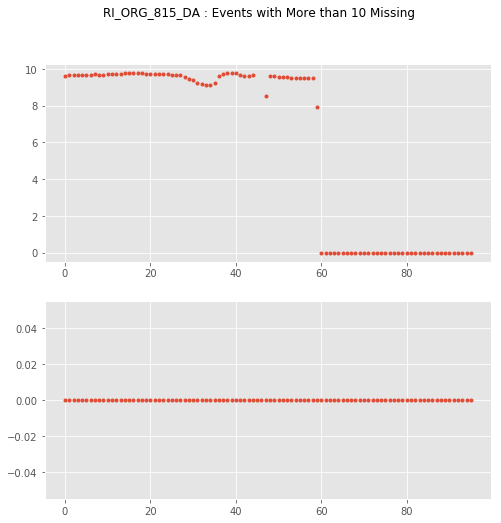

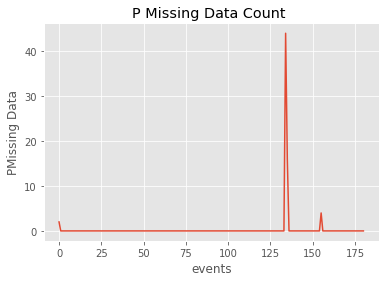

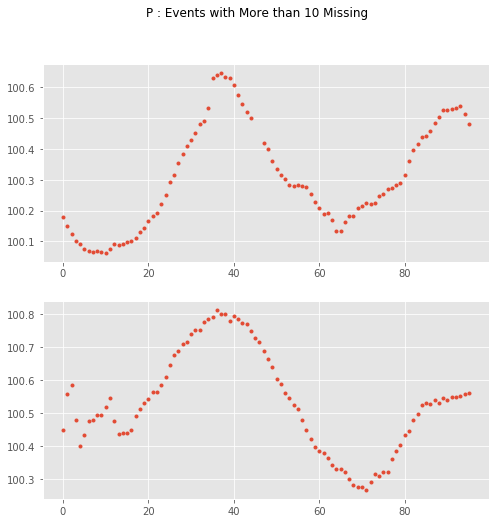

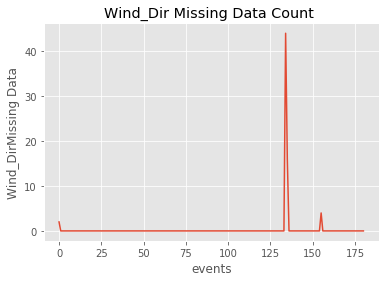

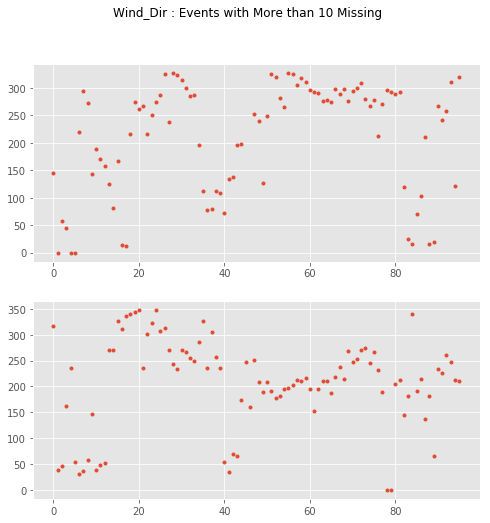

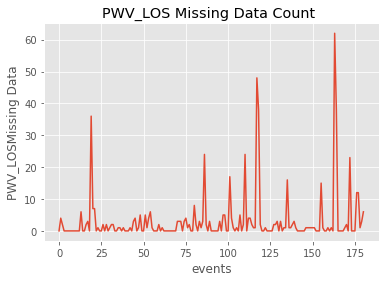

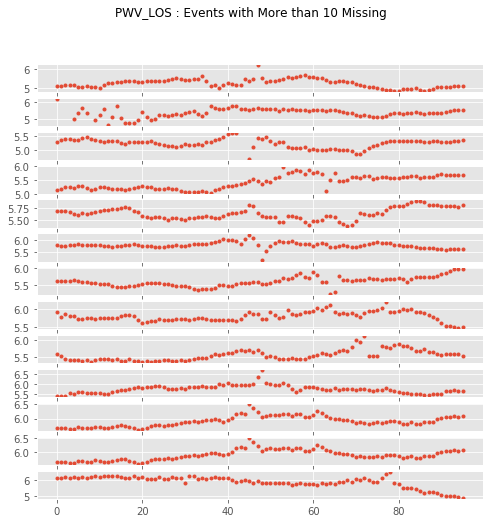

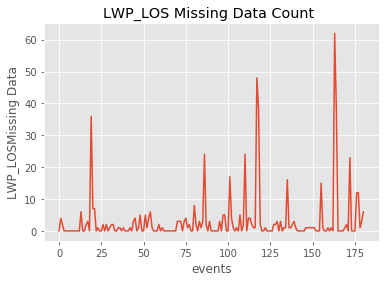

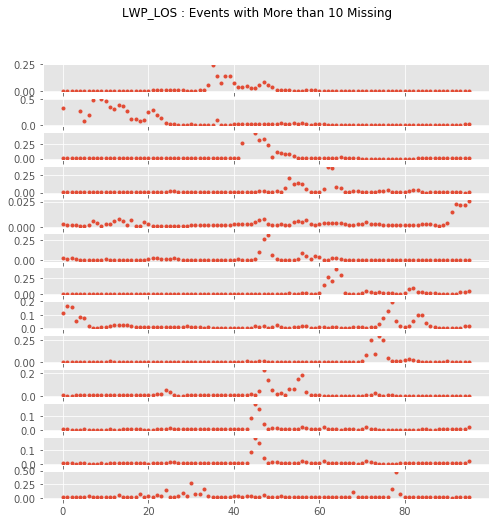

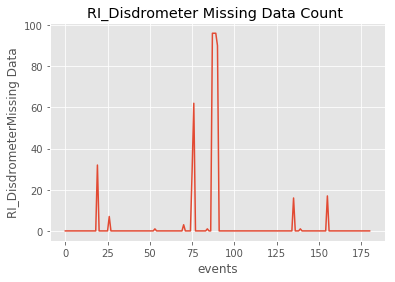

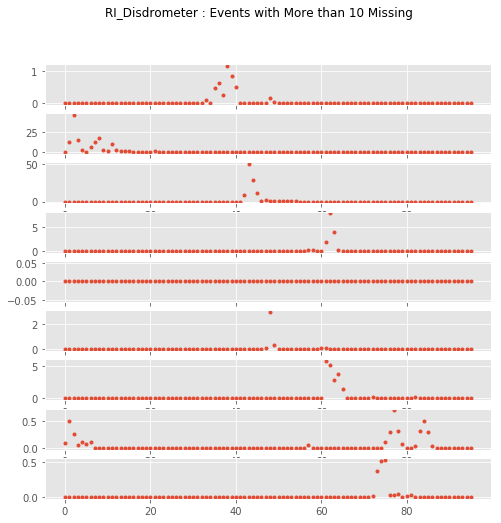

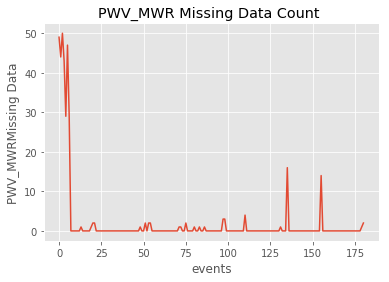

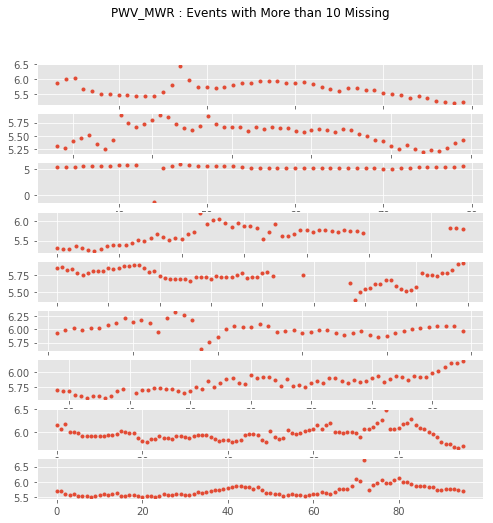

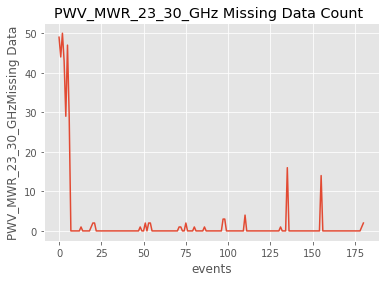

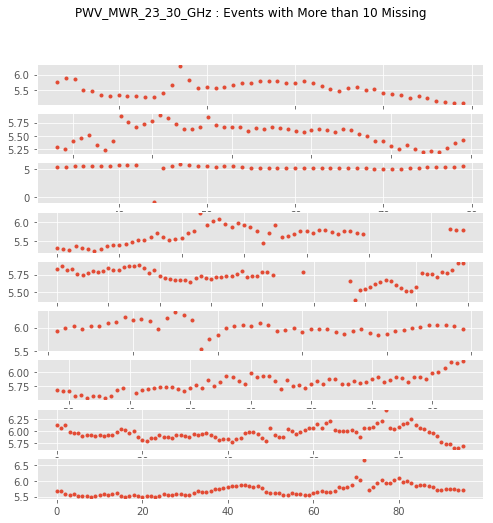

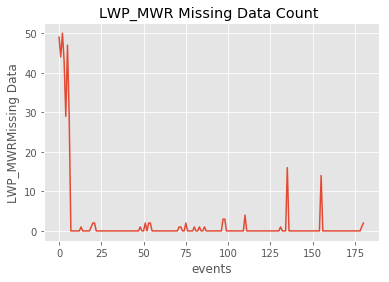

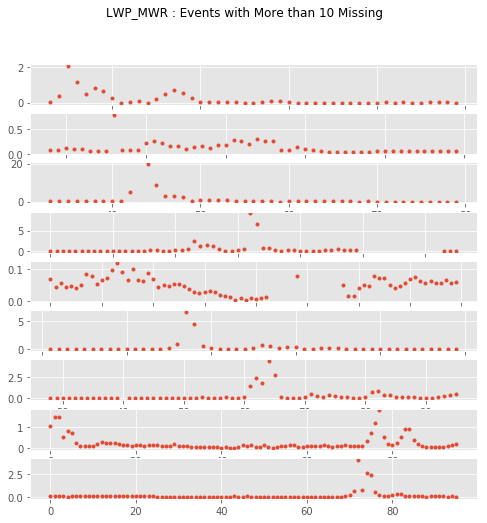

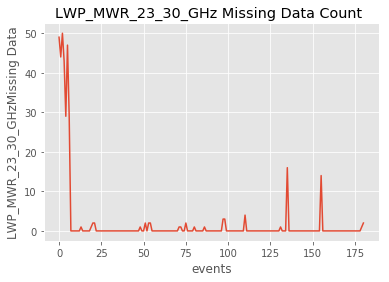

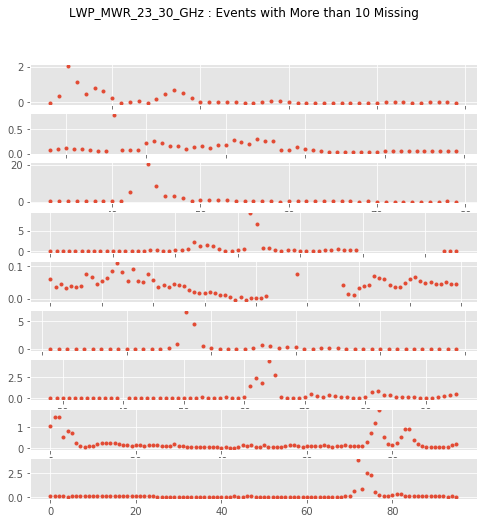

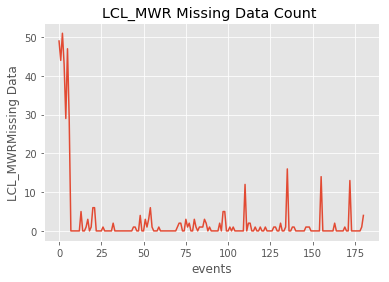

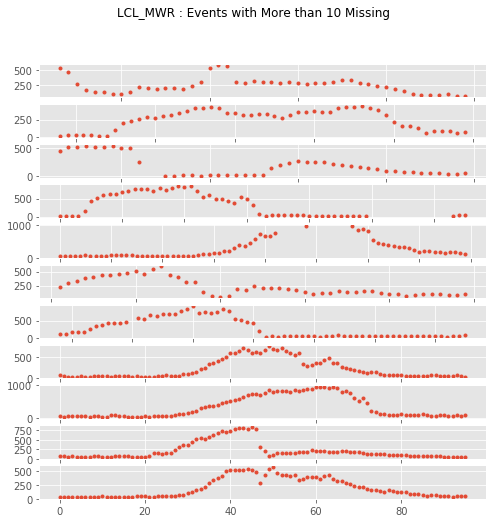

In [60]:
for idx in np.arange(1,15):

    valores= np.arange(0,vars()[df_15min.columns[idx]].shape[1])
    idx_v = np.arange(0,vars()[df_15min.columns[idx]].shape[1])

    for ievent in np.arange(0,vars()[df_15min.columns[idx]].shape[1]):
        valores[ievent] = np.isnan(vars()[df_15min.columns[idx]][:,ievent]).sum()

    plt.figure()
    plt.plot(valores)
    plt.ylabel(df_15min.columns[idx] + 'Missing Data')
    plt.xlabel('events')
    plt.title(df_15min.columns[idx] + ' Missing Data Count ')

    plt.figure(figsize=(8, 8))
    for i in np.arange(0,len(valores[valores > 10])):
        plt.subplot(len(valores[valores > 10]),1,i+1)
        plt.plot(vars()[df_15min.columns[idx]][:,i],'.')
        plt.suptitle(df_15min.columns[idx] + ' : Events with More than 10 Missing ' )
    

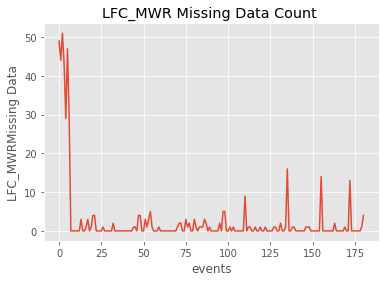

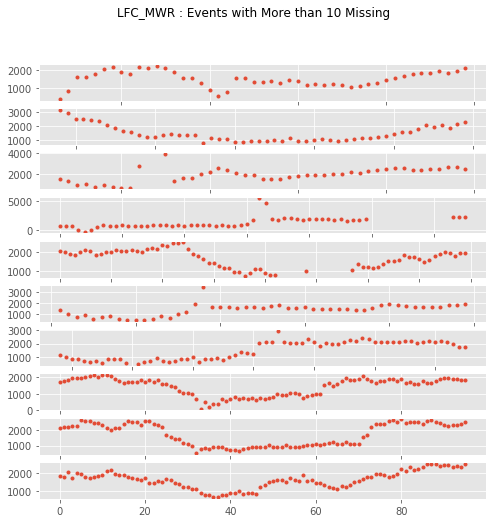

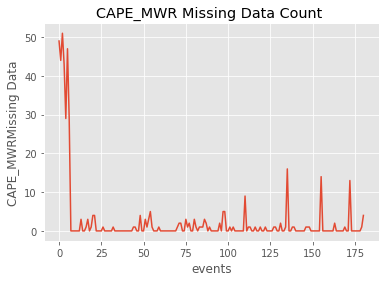

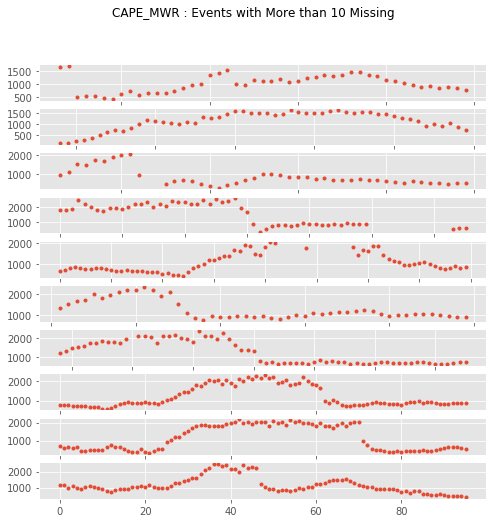

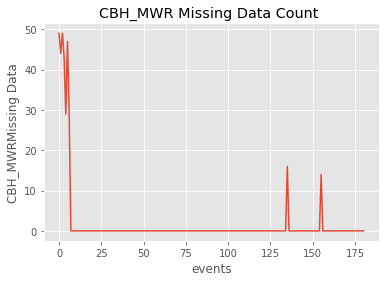

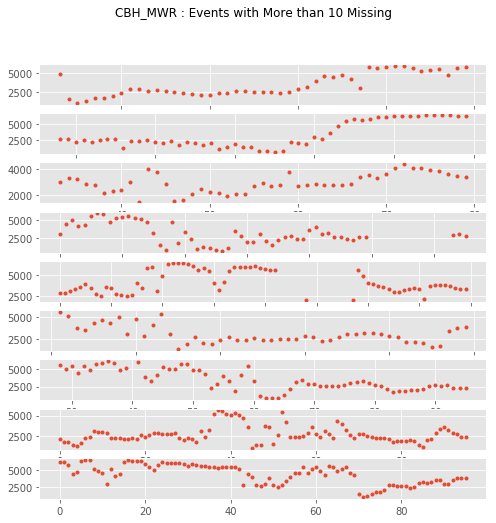

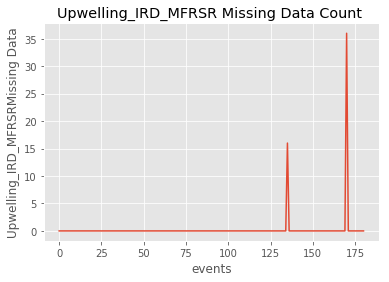

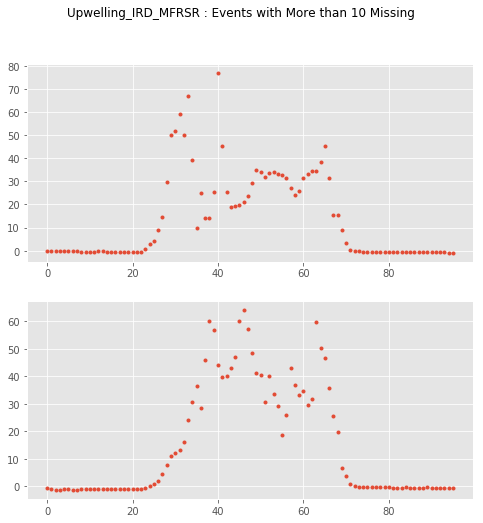

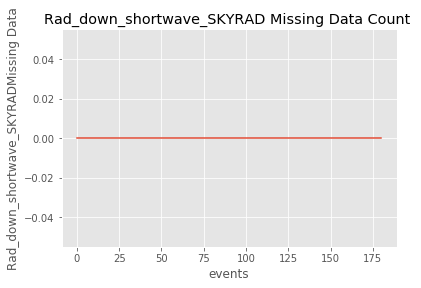

<Figure size 576x576 with 0 Axes>

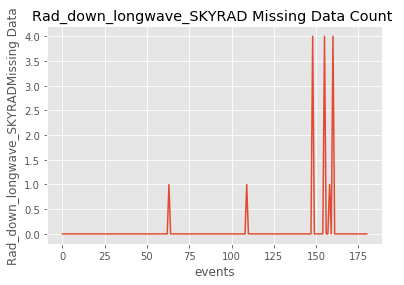

<Figure size 576x576 with 0 Axes>

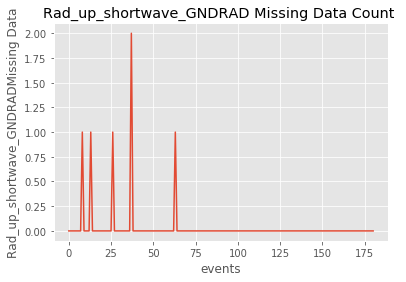

<Figure size 576x576 with 0 Axes>

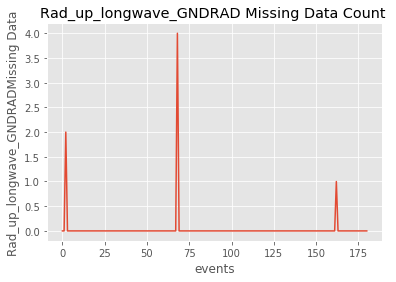

<Figure size 576x576 with 0 Axes>

In [61]:
for idx in np.arange(15,len(df_15min.columns)):

    valores= np.arange(0,vars()[df_15min.columns[idx]].shape[1])
    idx_v = np.arange(0,vars()[df_15min.columns[idx]].shape[1])

    for ievent in np.arange(0,vars()[df_15min.columns[idx]].shape[1]):
        valores[ievent] = np.isnan(vars()[df_15min.columns[idx]][:,ievent]).sum()

    plt.figure()
    plt.plot(valores)
    plt.ylabel(df_15min.columns[idx] + 'Missing Data')
    plt.xlabel('events')
    plt.title(df_15min.columns[idx] + ' Missing Data Count ')

    plt.figure(figsize=(8, 8))
    for i in np.arange(0,len(valores[valores > 10])):
        plt.subplot(len(valores[valores > 10]),1,i+1)
        plt.plot(vars()[df_15min.columns[idx]][:,i],'.')
        plt.suptitle(df_15min.columns[idx] + ' : Events with More than 10 Missing ' )


## Interpolate using akima, repeat last one and fill all other nans with row mean  (same local time)

And finally due to a persistent existence of null values, row mean calculation to substitute in the remaining nan, of each column for the same row.
Remember that each column is a deep convective event and each line is a tn of this day due to periodicity of time series, so each line has the same value of Local Time. The mean valued of each row represents the men value of the variable of an especific Time of day during almost 2 years.


In [62]:
for idx in np.arange(1,len(df_15min.columns)):
    np_i = vars()[df_15min.columns[idx]]
    vars()[str('df_') + df_15min.columns[idx]] = pd.DataFrame(data=np_i[:],copy=True) 
    df_i = vars()[str('df_') + df_15min.columns[idx]]
    df_i = df_i.interpolate(method='akima',axis=0)
    df_i = df_i.fillna(method='pad', limit=1)
    vars()[str('df_') + df_15min.columns[idx]] = df_i
    m = df_i.mean(axis=1)
    for i, col in enumerate(df_i):
        df_i.iloc[:, i] = df_i.iloc[:, i].fillna(m)    
    print(str(df_i.isna().sum().sum()) + '  :  ' + df_15min.columns[idx])

0  :  T
0  :  RH
0  :  Wind_Speed
0  :  RI_ORG_815_DA
0  :  P
0  :  Wind_Dir
0  :  PWV_LOS
0  :  LWP_LOS
0  :  RI_Disdrometer
0  :  PWV_MWR
0  :  PWV_MWR_23_30_GHz
0  :  LWP_MWR
0  :  LWP_MWR_23_30_GHz
0  :  LCL_MWR
0  :  LFC_MWR
0  :  CAPE_MWR
0  :  CBH_MWR
0  :  Upwelling_IRD_MFRSR
0  :  Rad_down_shortwave_SKYRAD
0  :  Rad_down_longwave_SKYRAD
0  :  Rad_up_shortwave_GNDRAD
0  :  Rad_up_longwave_GNDRAD


## Check Results

0  :  T


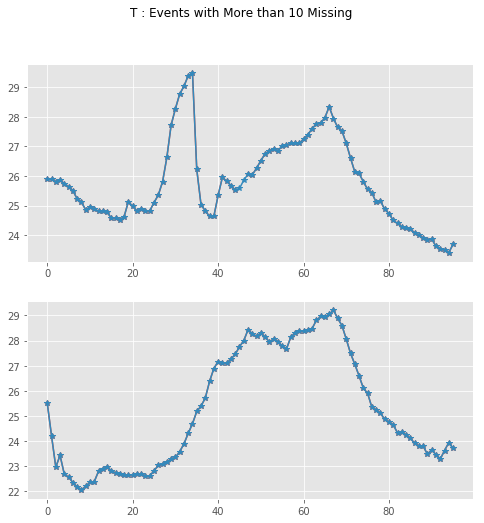

0  :  RH


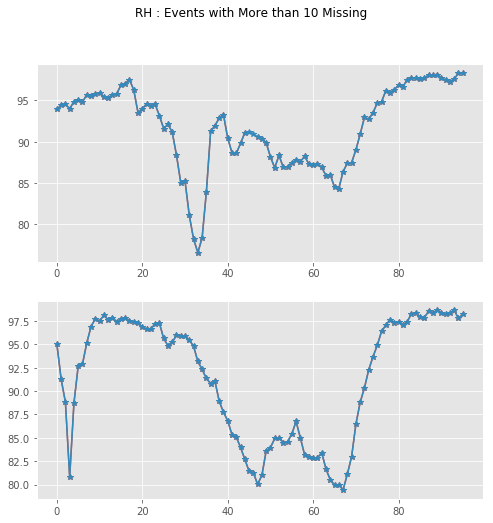

0  :  Wind_Speed


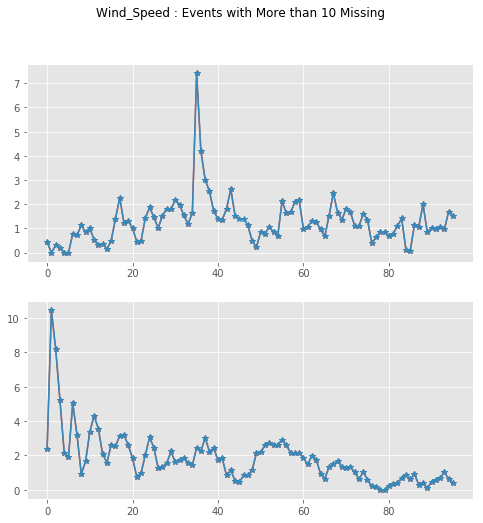

0  :  RI_ORG_815_DA


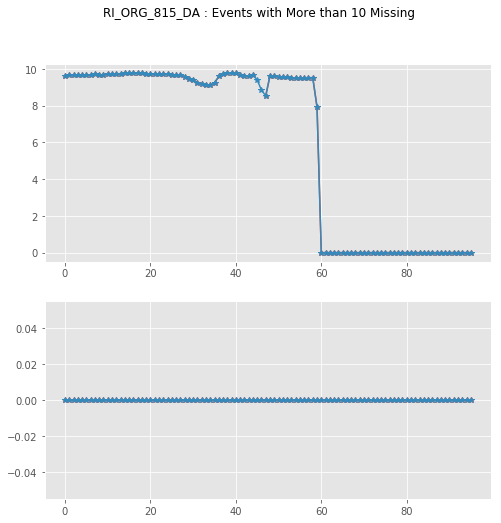

0  :  P


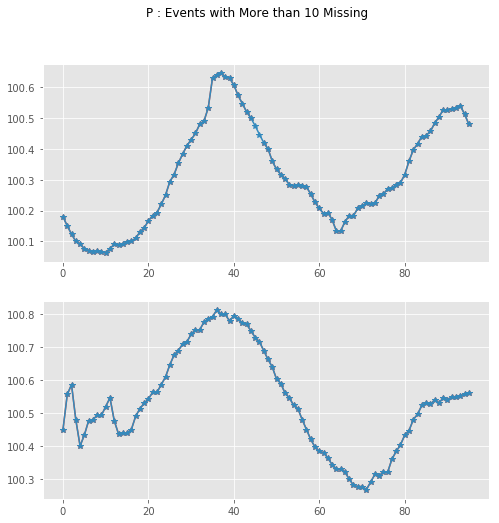

0  :  Wind_Dir


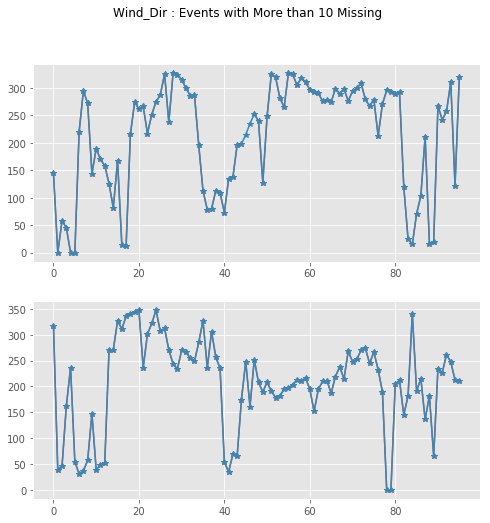

0  :  PWV_LOS


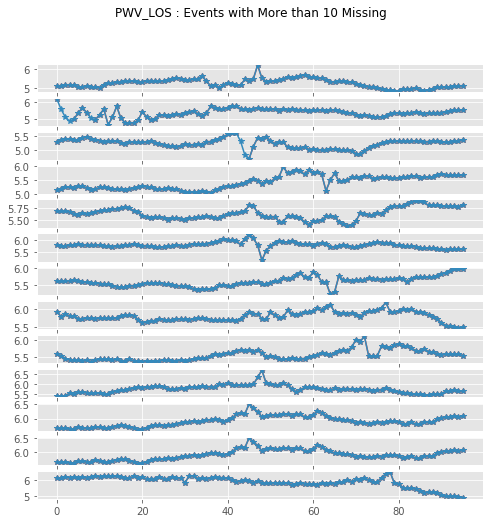

0  :  LWP_LOS


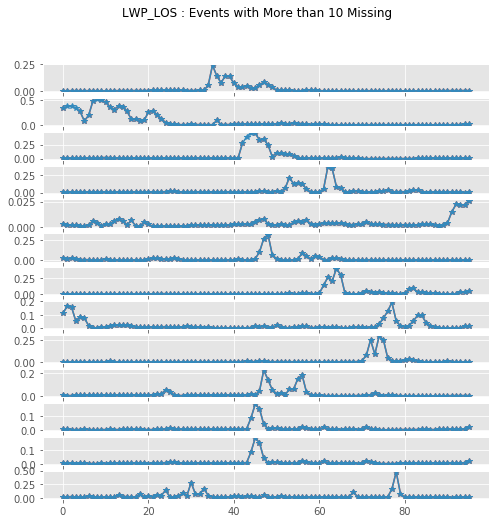

0  :  RI_Disdrometer


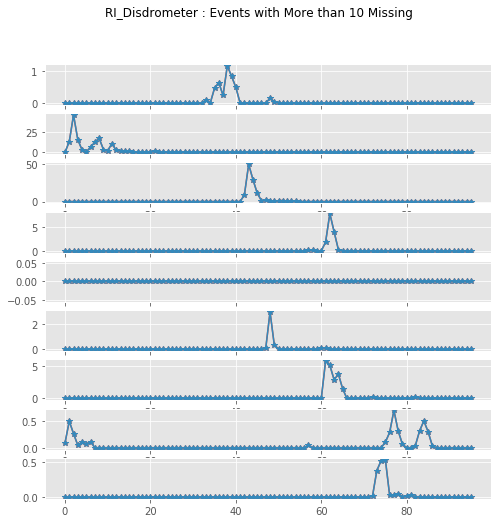

0  :  PWV_MWR


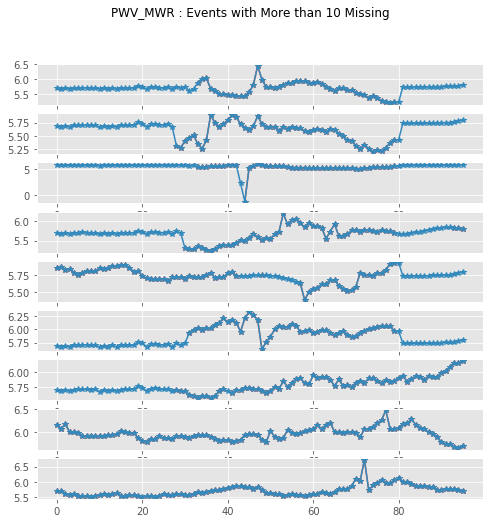

0  :  PWV_MWR_23_30_GHz


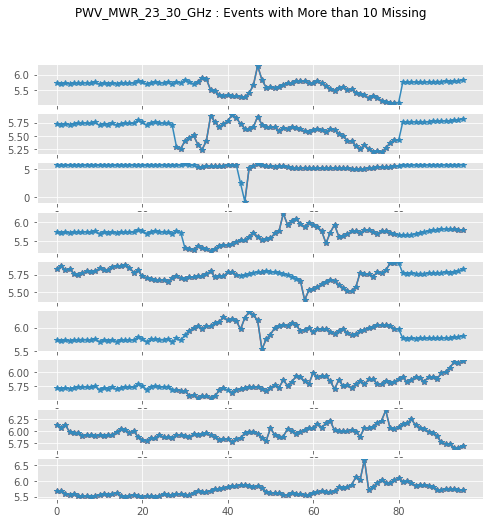

0  :  LWP_MWR


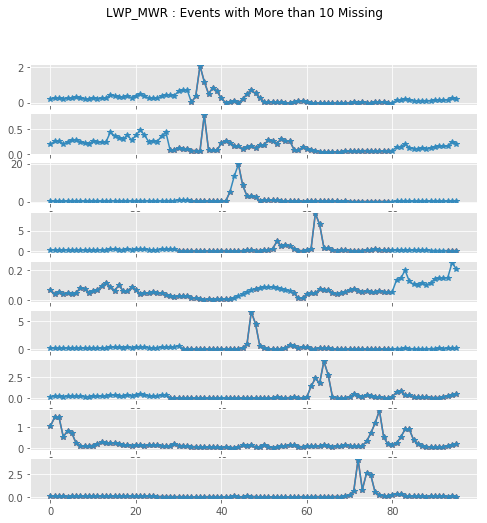

0  :  LWP_MWR_23_30_GHz


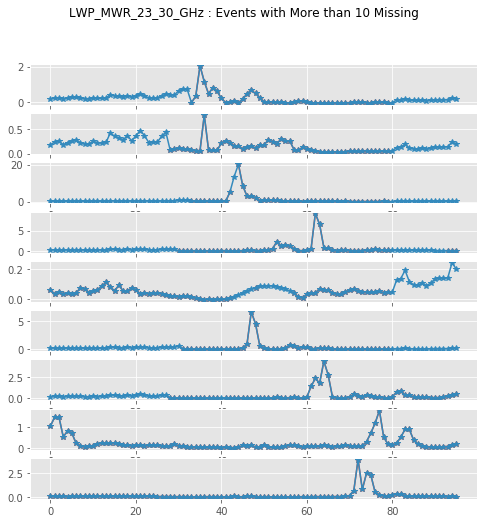

0  :  LCL_MWR


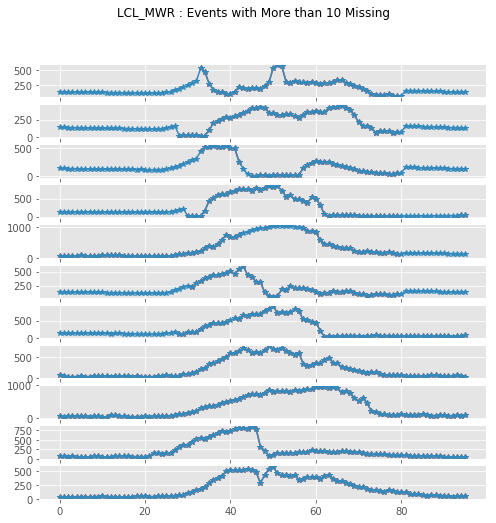

0  :  LFC_MWR


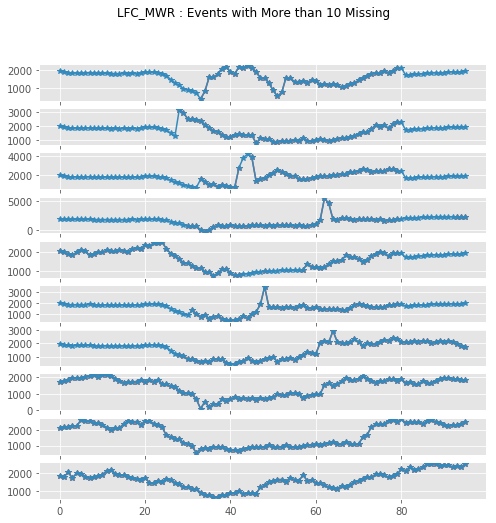

0  :  CAPE_MWR


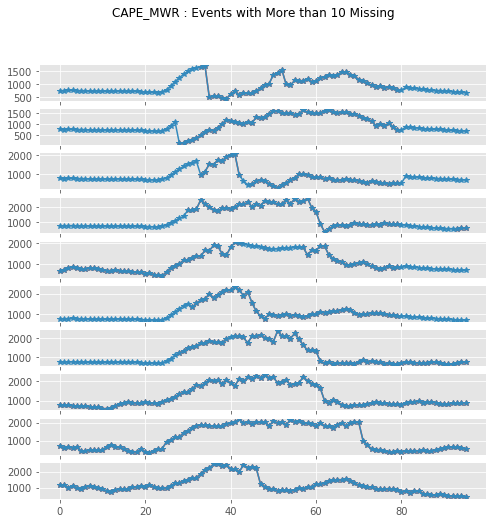

0  :  CBH_MWR


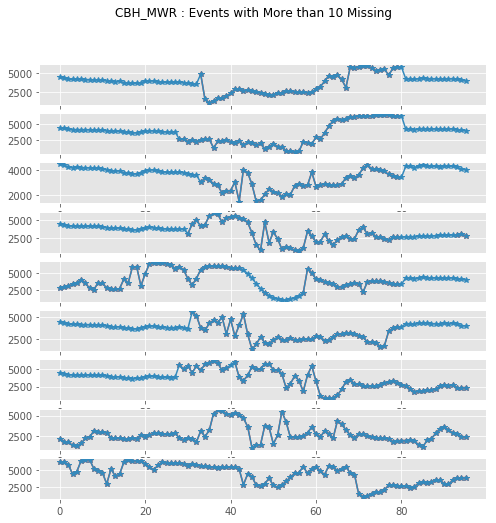

0  :  Upwelling_IRD_MFRSR


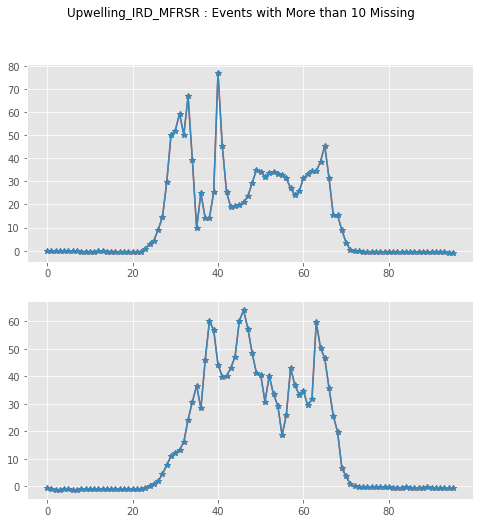

0  :  Rad_down_shortwave_SKYRAD


<Figure size 576x576 with 0 Axes>

0  :  Rad_down_longwave_SKYRAD


<Figure size 576x576 with 0 Axes>

0  :  Rad_up_shortwave_GNDRAD


<Figure size 576x576 with 0 Axes>

0  :  Rad_up_longwave_GNDRAD


<Figure size 576x576 with 0 Axes>

In [63]:
for idx in np.arange(1,len(df_15min.columns)):
    vect_i  = vars()[df_15min.columns[idx]]
    df_i    = vars()[str('df_') + df_15min.columns[idx]]
    
    valores = np.arange(0,vect_i.shape[1])
    idx_v   = np.arange(0,vect_i.shape[1])

    for ievent in np.arange(0,vect_i.shape[1]):
        valores[ievent] = np.isnan(vect_i[:,ievent]).sum()

    print(str(df_i.isna().sum().sum()) + '  :  ' + df_15min.columns[idx])
    
    plt.figure(figsize=(8, 8))
    for i in np.arange(0,len(valores[valores > 10])):
        plt.subplot(len(valores[valores > 10]),1,i+1)
        plt.plot(vect_i[:,i],'*-')
        plt.plot(df_i.iloc[:,i].values,'*-')
        plt.suptitle(df_15min.columns[idx] + ' : Events with More than 10 Missing ' )
    plt.show()

## Cluster Again


In [77]:
for idx in np.arange(1,len(df_15min.columns)):
    vect_i  = vars()[df_15min.columns[idx]]
    df_i    = vars()[str('df_') + df_15min.columns[idx]]
    series  = np.transpose(df_i.as_matrix())
    
    ds = dtw.distance_matrix_fast(series)
    model1 = clustering.Hierarchical(dtw.distance_matrix_fast, {})
    model2 = clustering.HierarchicalTree(model1)
    model3 = clustering.LinkageTree(dtw.distance_matrix_fast, {})
    cluster_idx = model3.fit(series)    
    model2.plot
    model3.plot
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [74]:
plt.figure()
model2.plot
plt.show()

<Figure size 432x288 with 0 Axes>

In [76]:
model3.plot

<bound method BaseTree.plot of <dtaidistance.clustering.LinkageTree object at 0x00000280A9B5CA20>>

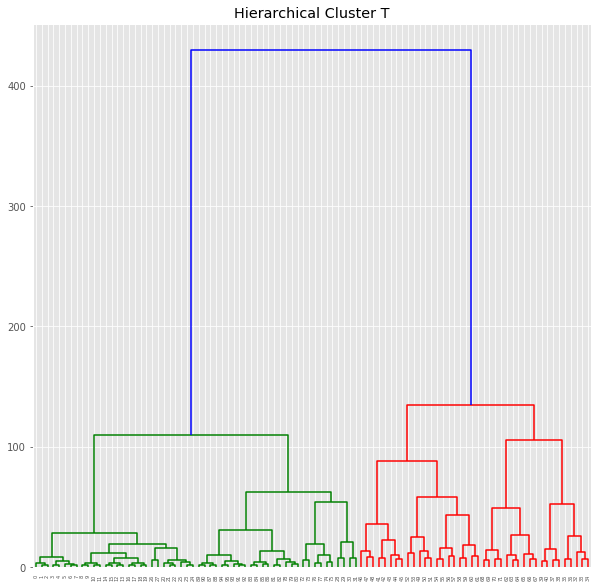

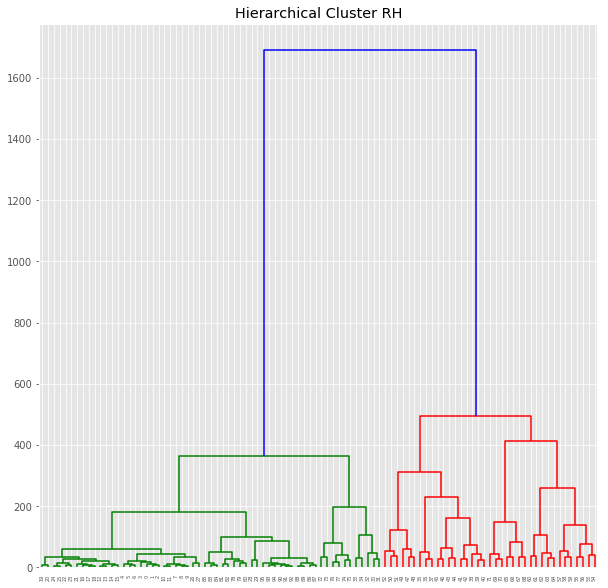

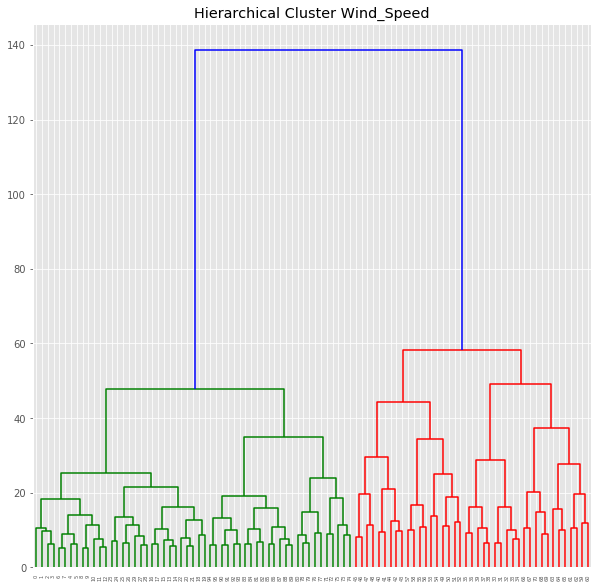

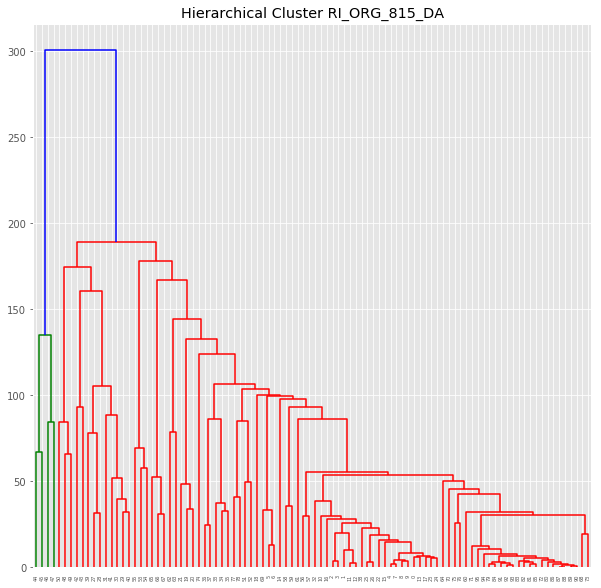

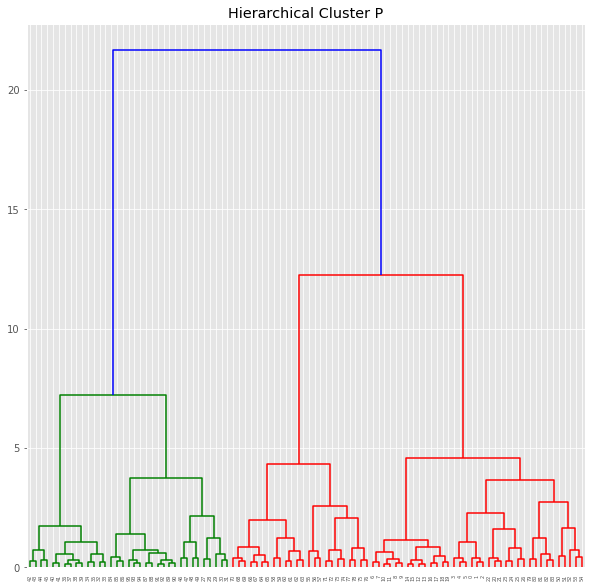

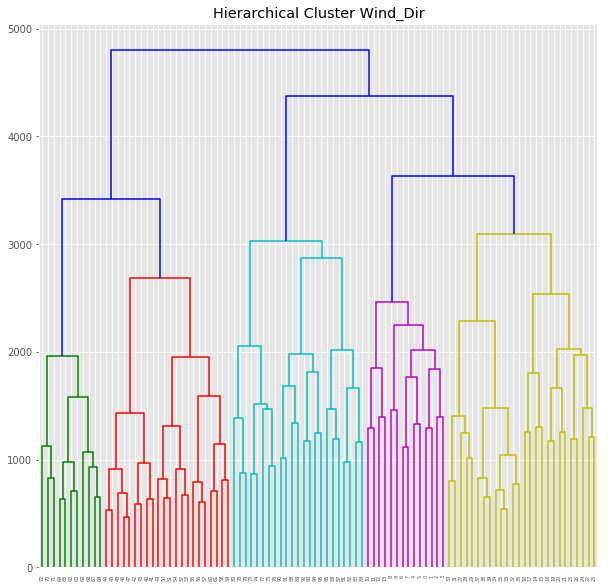

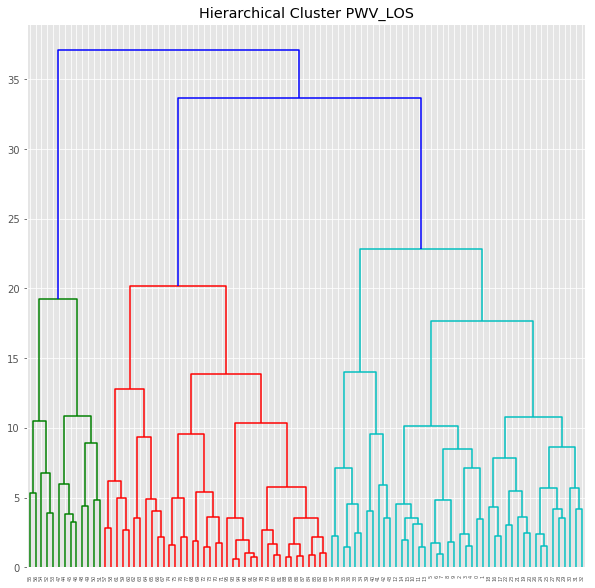

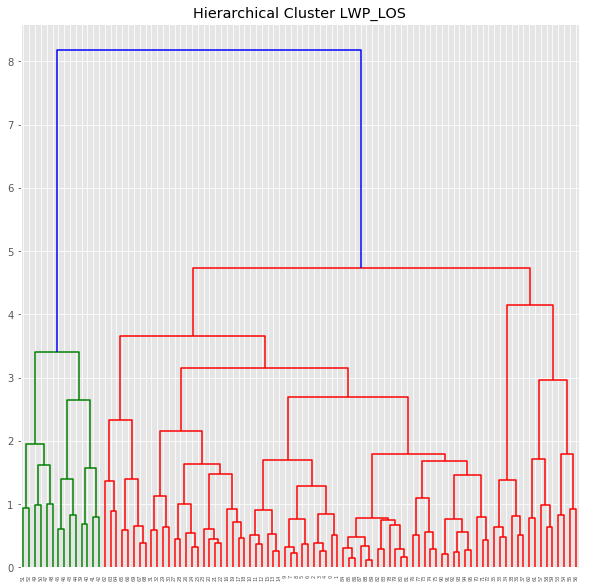

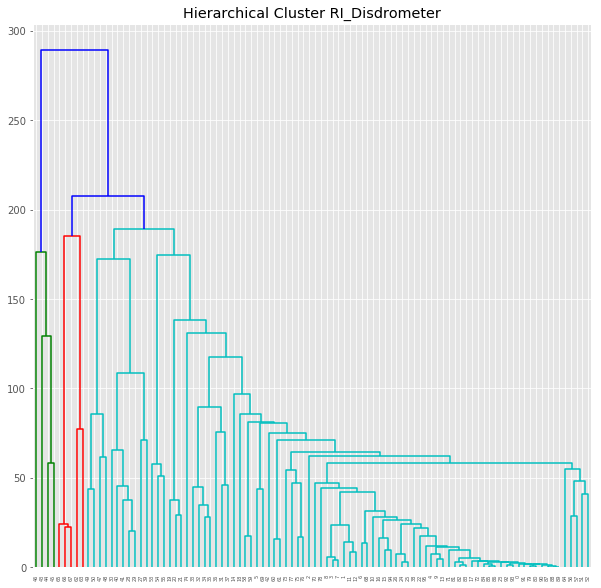

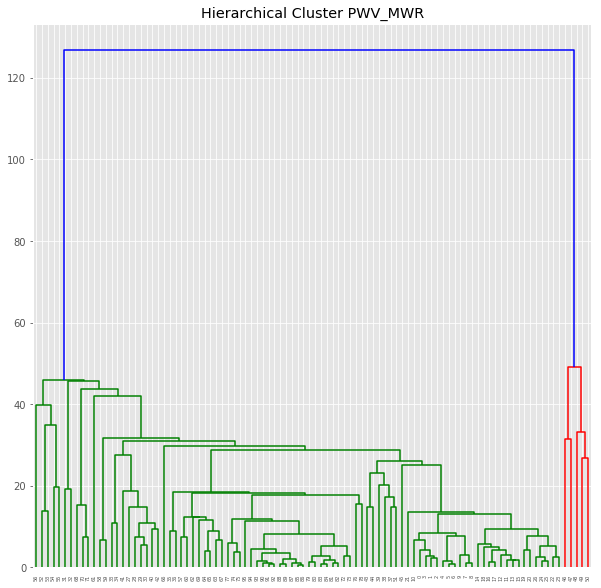

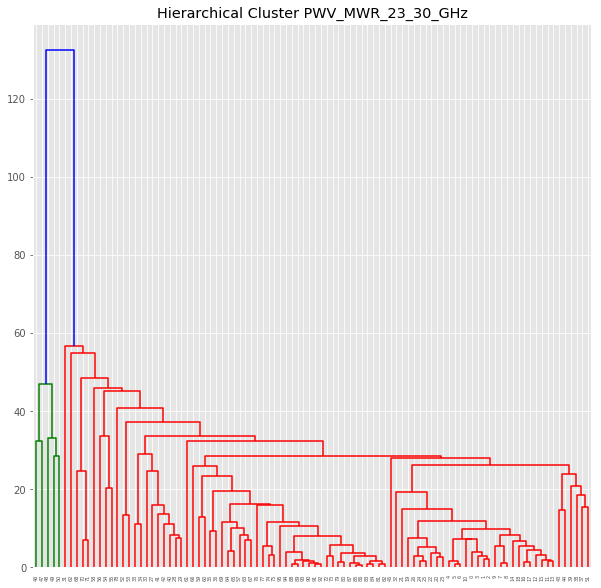

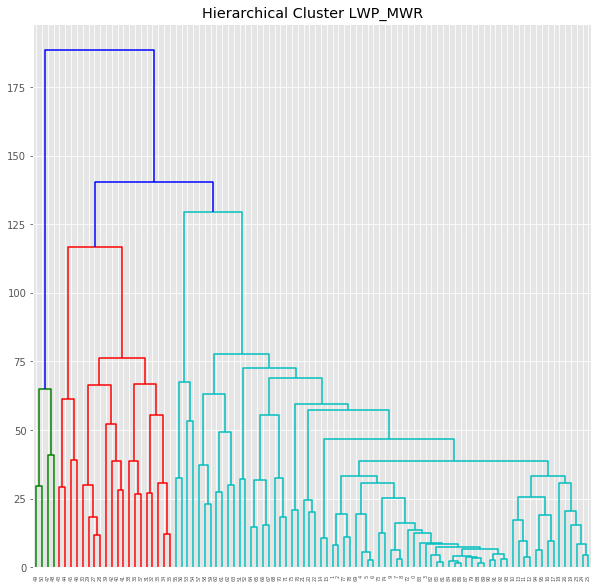

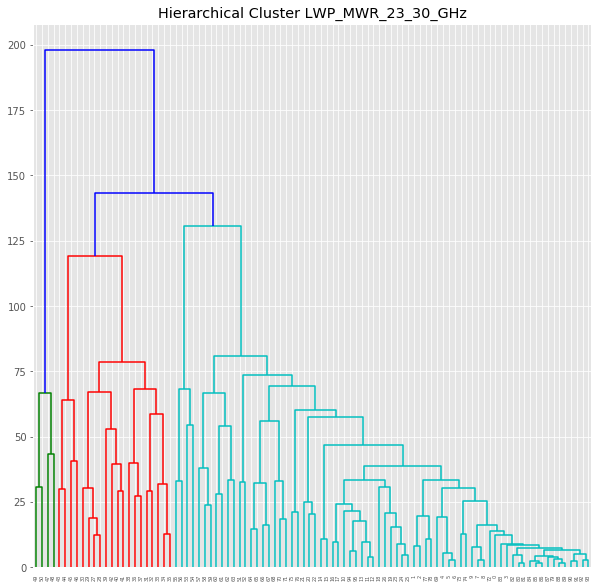

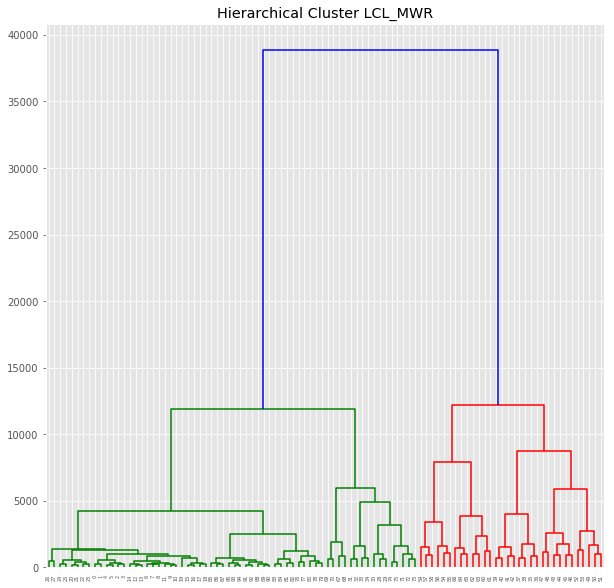

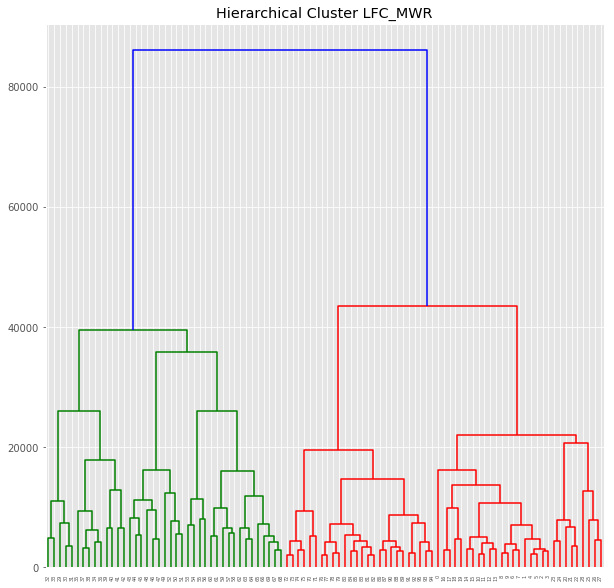

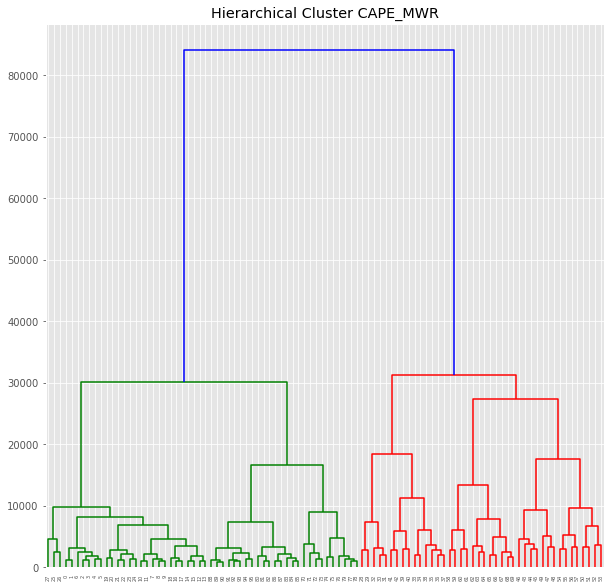

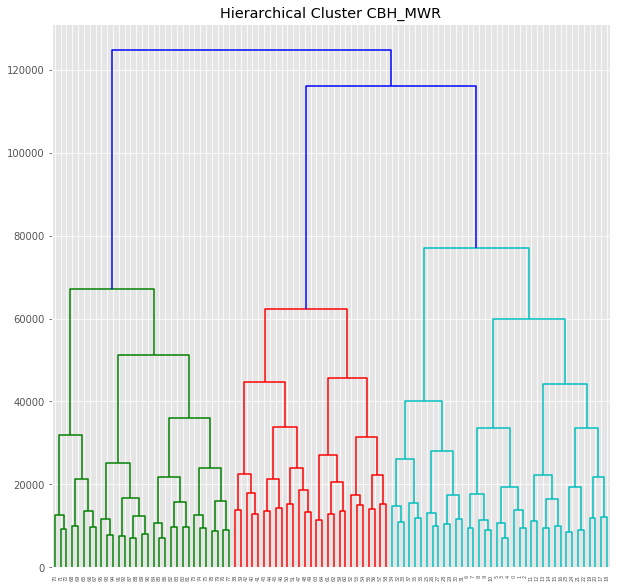

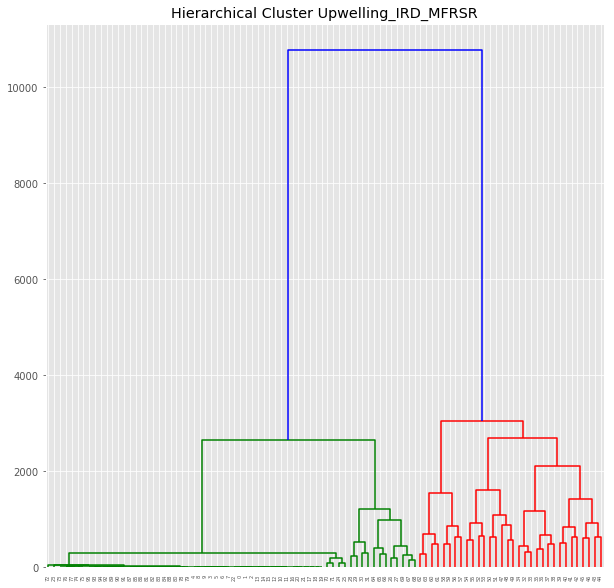

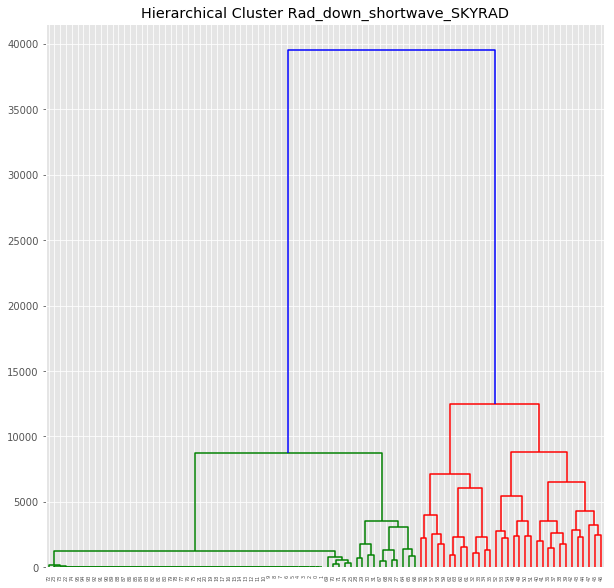

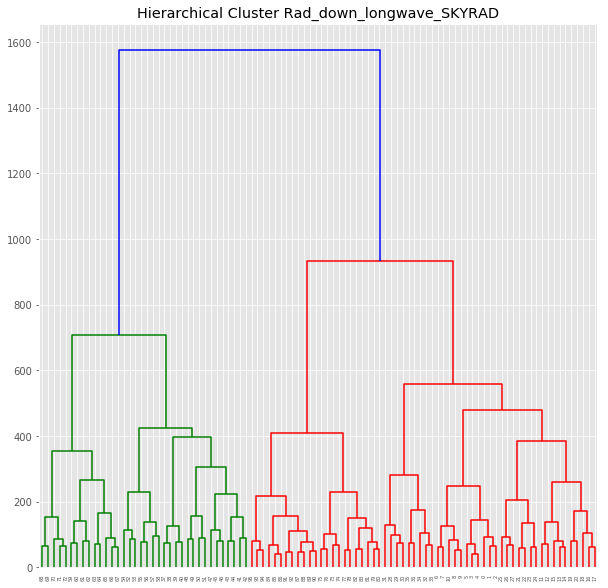

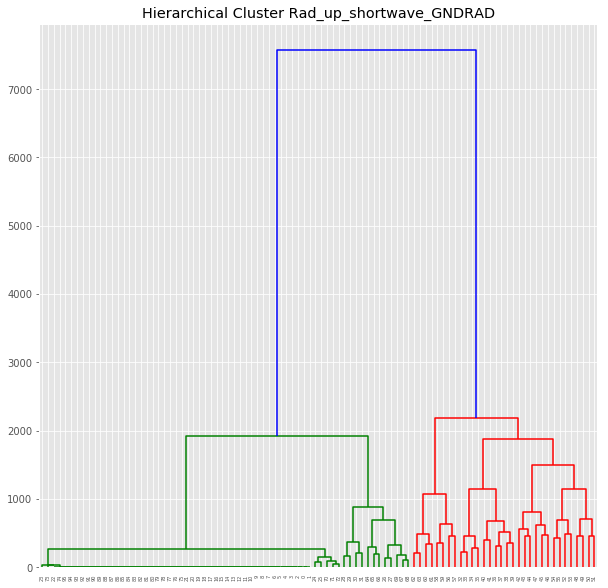

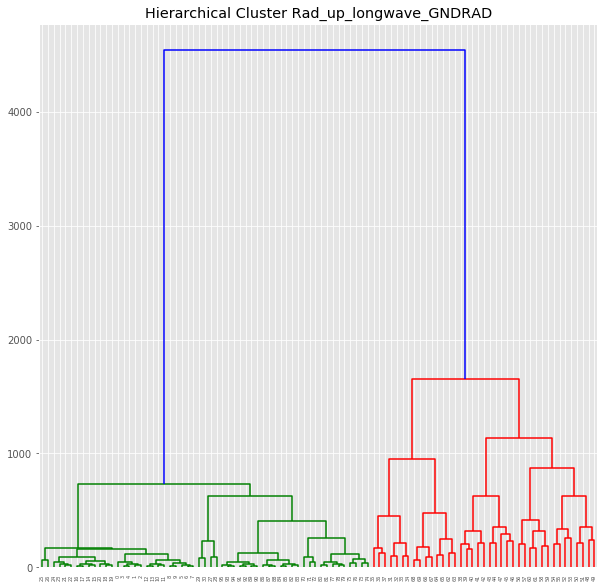

In [83]:
from scipy.cluster.hierarchy import dendrogram, linkage
for idx in np.arange(1,len(df_15min.columns)):
    df_i    = vars()[str('df_') + df_15min.columns[idx]]
    z = linkage(df_i.iloc[:,0:181],'ward')

    plt.figure(figsize=(10,10))
    dendrogram(z)
    plt.title('Hierarchical Cluster ' + df_15min.columns[idx])
    plt.show()